In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [84]:
country_df_true = pd.read_csv("country_df1.csv", index_col="Date")

In [85]:
country_df_true.tail(40)

CPI_USA_Index  CPI_Japan_Index  USA_WageH_Dollar  \
Date                                                           
2021-07-01        271.994       101.603461          120.0804   
2021-08-01        272.789       101.603461          120.8340   
2021-09-01        273.887       101.908883          121.0852   
2021-10-01        276.434       101.705269          121.4369   
2021-11-01        278.799       101.807076          121.7384   
2021-12-01        280.808       101.908883          122.5423   
2022-01-01        282.390       102.112497          123.2457   
2022-02-01        284.535       102.519725          123.4969   
2022-03-01        287.553       102.926953          124.4013   
2022-04-01        288.764       103.334182          124.8535   
2022-05-01        291.359       101.800000          125.5066   
2022-06-01        294.996       101.800000          125.3559   
2022-07-01        294.977       102.300000          126.1095   
2022-08-01        295.209       102.700000          126.3607   
2022-09-01        296.341       103.100000          126.8632   
2022-10-01        297.863       103.700000          127.6168   
2022-11-01        298.648       103.900000          128.4709   
2022-12-01        298.812       104.100000          129.0236   
2023-01-01        300.356       104.700000          129.8777   
2023-02-01        301.509       104.000000          129.7773   
2023-03-01        301.744       104.400000          130.3802   
2023-04-01        303.032       105.100000          130.7821   
2023-05-01        303.365       105.100000          131.3348   
2023-06-01        304.003       105.200000          132.4401   
2023-07-01        304.628       105.700000          132.9928   
2023-08-01        306.187       105.900000          133.0430   
2023-09-01        307.288       106.200000          133.7464   
2023-10-01        307.531       107.100000          133.8972   
2023-11-01        308.024       106.900000          135.1030   
2023-12-01        308.742       106.800000          136.3088   
2024-01-01        309.685       106.900000          136.7108   
2024-02-01        311.054       106.900000          137.4142   
2024-03-01        312.230       107.200000          137.9668   
2024-04-01        313.207       107.700000          138.4190   
2024-05-01        313.225       108.100000          138.9214   
2024-06-01        313.049       108.200000          139.6248   
2024-07-01        313.534       108.600000          140.4790   
2024-08-01        314.121       109.100000          140.5292   
2024-09-01        314.686       108.900000          141.2829   
2024-10-01        315.454       109.500000          141.6346   

            Japan_WageH_Dollar  USA_GDP_Dollar_Capita  \
Date                                                    
2021-07-01            100.6728           62741.001813   
2021-08-01            102.9654           63720.764161   
2021-09-01            102.7660           63720.764161   
2021-10-01            102.2676           63720.764161   
2021-11-01            102.3673           63720.764161   
2021-12-01            100.3738           63720.764161   
2022-01-01            102.6663           63720.764161   
2022-02-01            102.8657           63720.764161   
2022-03-01            102.6663           63720.764161   
2022-04-01            104.1615           63720.764161   
2022-05-01            100.8722           63720.764161   
2022-06-01            103.6631           63720.764161   
2022-07-01            104.8592           63720.764161   
2022-08-01            102.9654           65020.352929   
2022-09-01            103.0650           65020.352929   
2022-10-01            103.3641           65020.352929   
2022-11-01            104.2612           65020.352929   
2022-12-01            103.8624           65020.352929   
2023-01-01            103.6631           65020.352929   
2023-02-01            103.3641           65020.352929   
2023-03-01            104.7595           65020.352929   
2023-04-01  

#   Feature Engineering

In [86]:
country_df1 = country_df_true.copy()

In [87]:
country_df1.columns

Index(['CPI_USA_Index', 'CPI_Japan_Index', 'USA_WageH_Dollar',
       'Japan_WageH_Dollar', 'USA_GDP_Dollar_Capita',
       'Japan_GDP_Dollar_Capita', 'Japan Debt in 100 Billion of Yen',
       'USA Debt in 1Billion of USD', 'USA_%_Debt_to_GDP',
       'Japan_%_Debt_to_GDP'],
      dtype='object')

In [88]:
country_df1["Date"] = country_df1.index
country_df1["Date"] = pd.to_datetime(country_df1["Date"])
country_df1[["CPI_USA_Change"]] = country_df1[["CPI_USA_Index"]] - country_df1[["CPI_USA_Index"]].shift(periods=1)
country_df1[["CPI_Japan_Change"]] = country_df1[["CPI_Japan_Index"]] - country_df1[["CPI_Japan_Index"]].shift(periods=1)
country_df1[["USA_WageH_Change"]] = country_df1[["USA_WageH_Dollar"]] - country_df1[["USA_WageH_Dollar"]].shift(periods=1)
country_df1[["Japan_WageH_Change"]] = country_df1[["Japan_WageH_Dollar"]] - country_df1[["Japan_WageH_Dollar"]].shift(periods=1)
country_df1[["USA_GDP_Dollar_Change"]] = country_df1[["USA_GDP_Dollar_Capita"]] - country_df1[["USA_GDP_Dollar_Capita"]].shift(periods=1)
country_df1[["Japan_GDP_Dollar_Change"]] = country_df1[["Japan_GDP_Dollar_Capita"]] - country_df1[["Japan_GDP_Dollar_Capita"]].shift(periods=1)
country_df1[["USA_Debt_Change"]] = country_df1[["USA Debt in 1Billion of USD"]] - country_df1[["USA Debt in 1Billion of USD"]].shift(periods=1)
country_df1[["Japan_Debt_Change"]] = country_df1[["Japan Debt in 100 Billion of Yen"]] - country_df1[["Japan Debt in 100 Billion of Yen"]].shift(periods=1)
country_df1[["USA_%_Debt_to_GDP_Change"]] = country_df1[["USA_%_Debt_to_GDP"]] - country_df1[["USA_%_Debt_to_GDP"]].shift(periods=1)
country_df1[["Japan_%_Debt_to_GDP_Change"]] = country_df1[["Japan_%_Debt_to_GDP"]] - country_df1[["Japan_%_Debt_to_GDP"]].shift(periods=1)
country_df1.drop(['CPI_USA_Index', 'CPI_Japan_Index', 'USA_WageH_Dollar',
       'Japan_WageH_Dollar', 'USA_GDP_Dollar_Capita',
       'Japan_GDP_Dollar_Capita', 'Japan Debt in 100 Billion of Yen',
       'USA Debt in 1Billion of USD', 'USA_%_Debt_to_GDP',
       'Japan_%_Debt_to_GDP'], axis=1, inplace=True)


In [89]:
country_df1.dtypes

Date                          datetime64[ns]
CPI_USA_Change                       float64
CPI_Japan_Change                     float64
USA_WageH_Change                     float64
Japan_WageH_Change                   float64
USA_GDP_Dollar_Change                float64
Japan_GDP_Dollar_Change              float64
USA_Debt_Change                      float64
Japan_Debt_Change                    float64
USA_%_Debt_to_GDP_Change             float64
Japan_%_Debt_to_GDP_Change           float64
dtype: object

In [90]:
country_df1["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].head()

Date
1990-08-01    -562.225997
1991-08-01     810.107471
1992-08-01     554.528940
1993-08-01    1104.511959
1994-08-01     603.832541
Name: USA_GDP_Dollar_Change, dtype: float64

#   USA key metrics

(0.0, 1.0, 0.0, 1.0)

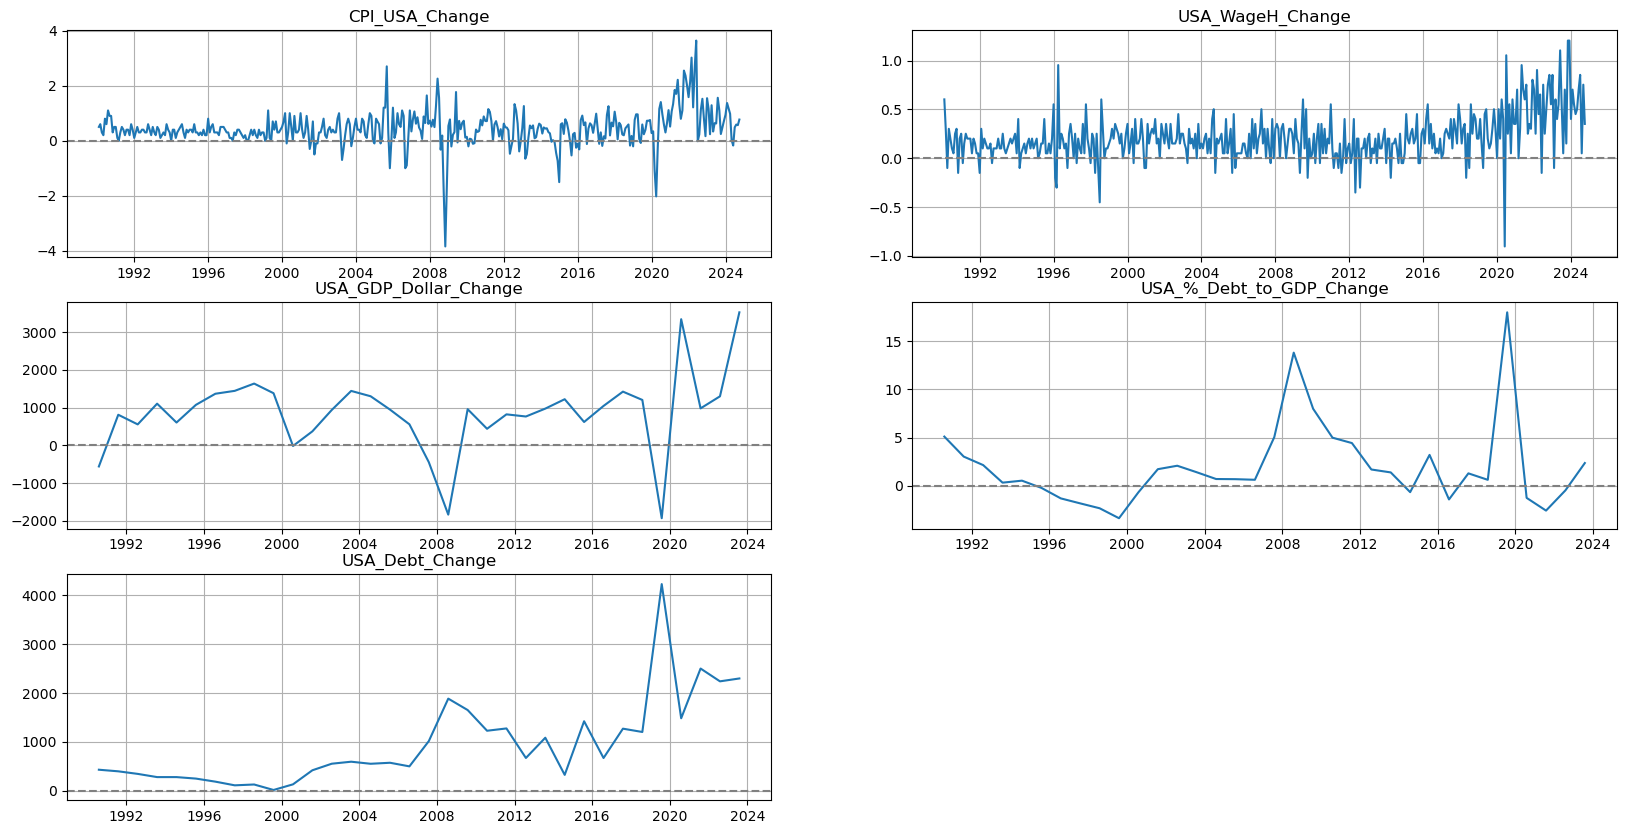

In [91]:
#   USA economics in changes
fig, axs = plt.subplots(3, 2, figsize=(20,10))

axs[0,0].plot(country_df1["Date"], country_df1[["CPI_USA_Change"]].values)
axs[0,0].set_title("CPI_USA_Change")
axs[0,0].axhline(y=0, color="grey", linestyle="--")
axs[0,0].grid(True)
axs[0,1].plot(country_df1["Date"], country_df1[["USA_WageH_Change"]].values)
axs[0,1].set_title("USA_WageH_Change")
axs[0,1].axhline(y=0, color="grey", linestyle="--")
axs[0,1].grid(True)
axs[1,0].plot(country_df1["Date"][7:].iloc[::12][:-1], country_df1["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].values)
axs[1,0].set_title("USA_GDP_Dollar_Change")
axs[1,0].axhline(y=0, color="grey", linestyle="--")
axs[1,0].grid(True)
axs[1,1].plot(country_df1["Date"][7:].iloc[::12][:-1], country_df1["USA_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].values)
axs[1,1].set_title("USA_%_Debt_to_GDP_Change")
axs[1,1].axhline(y=0, color="grey", linestyle="--")
axs[1,1].grid(True)
axs[2,0].plot(country_df1["Date"][7:].iloc[::12][:-1], country_df1["USA_Debt_Change"][7:].iloc[::12][:-1].values)
axs[2,0].set_title("USA_Debt_Change")
axs[2,0].axhline(y=0, color="grey", linestyle="--")
axs[2,0].grid(True)


axs[2, 1].axis('off')


#   Japan key metrics

(0.0, 1.0, 0.0, 1.0)

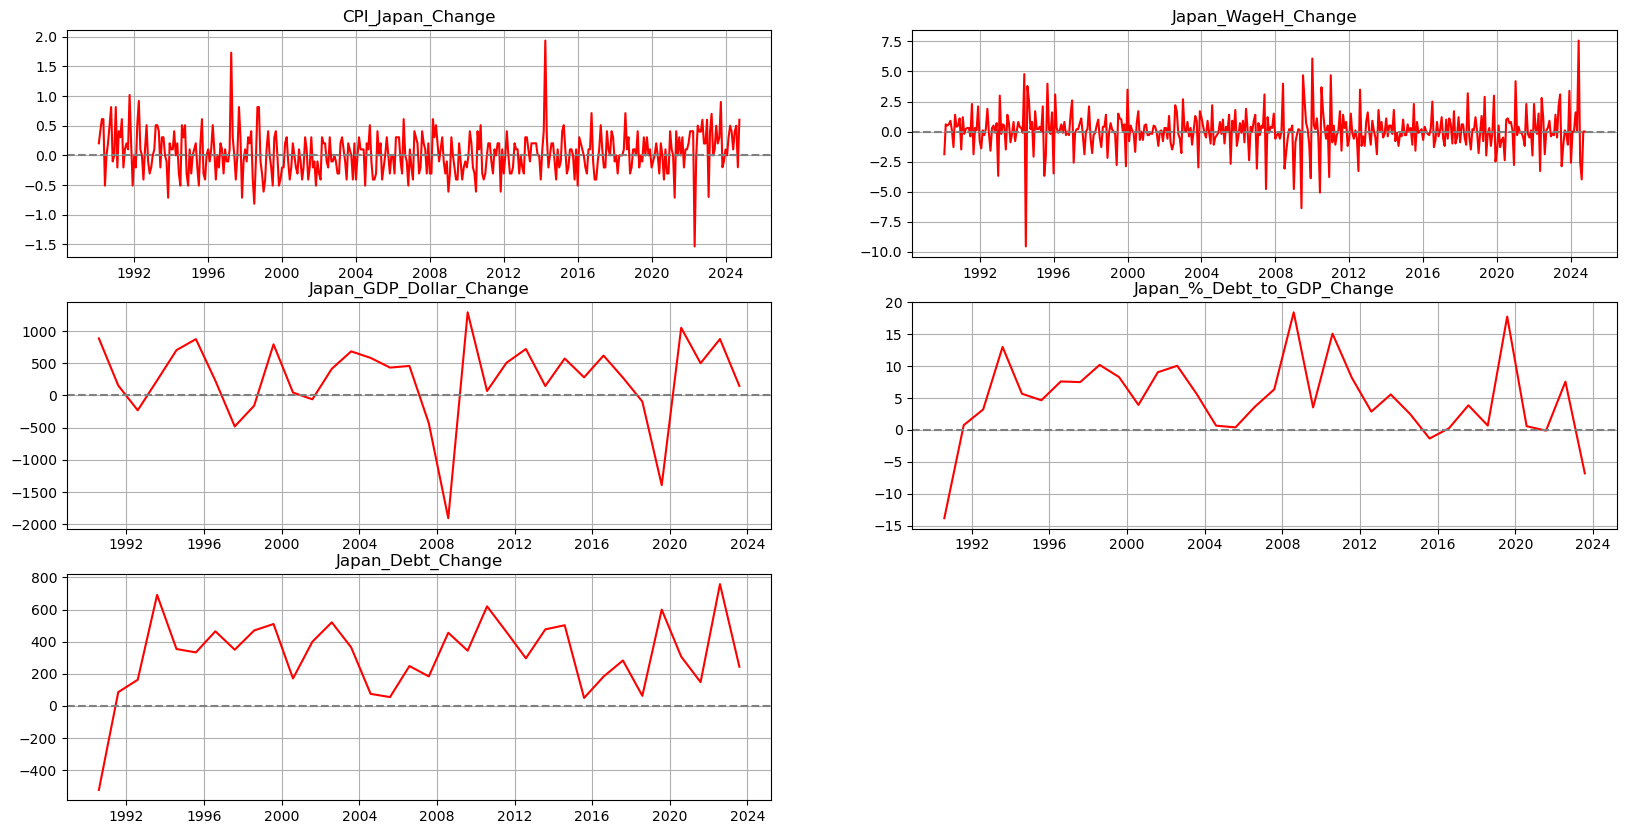

In [92]:
#   Japan economics in changes

fig, axs = plt.subplots(3, 2, figsize=(20,10))

axs[0,0].plot(country_df1["Date"], country_df1[["CPI_Japan_Change"]].values, color="red")
axs[0,0].set_title("CPI_Japan_Change")
axs[0,0].axhline(y=0, color="grey", linestyle="--")
axs[0,0].grid(True)
axs[0,1].plot(country_df1["Date"], country_df1[["Japan_WageH_Change"]].values, color="red")
axs[0,1].set_title("Japan_WageH_Change")
axs[0,1].axhline(y=0, color="grey", linestyle="--")
axs[0,1].grid(True)
axs[1,0].plot(country_df1["Date"][7:].iloc[::12][:-1], country_df1["Japan_GDP_Dollar_Change"][7:].iloc[::12][:-1].values, color="red")
axs[1,0].set_title("Japan_GDP_Dollar_Change")
axs[1,0].axhline(y=0, color="grey", linestyle="--")
axs[1,0].grid(True)
axs[1,1].plot(country_df1["Date"][7:].iloc[::12][:-1], country_df1["Japan_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].values, color="red")
axs[1,1].set_title("Japan_%_Debt_to_GDP_Change")
axs[1,1].axhline(y=0, color="grey", linestyle="--")
axs[1,1].grid(True)
axs[2,0].plot(country_df1["Date"][7:].iloc[::12][:-1], country_df1["Japan_Debt_Change"][7:].iloc[::12][:-1].values, color="red")
axs[2,0].set_title("Japan_Debt_Change")
axs[2,0].axhline(y=0, color="grey", linestyle="--")
axs[2,0].grid(True)


axs[2, 1].axis('off')

In [93]:
#   introducing moving Averages and means. !!!Ignoring Debt!!!

In [94]:
#   !!!Ignoring Debt!!! as I decide that the amount of debt does not really mean, but mor debt to gdp!

In [95]:
country_df2 = country_df1.copy()

In [96]:
country_df2.head()


Date  CPI_USA_Change  CPI_Japan_Change  USA_WageH_Change  \
Date                                                                        
1990-01-01 1990-01-01             NaN               NaN               NaN   
1990-02-01 1990-02-01             0.5          0.203614           0.60291   
1990-03-01 1990-03-01             0.6          0.407228           0.30146   
1990-04-01 1990-04-01             0.3          0.610842          -0.10048   
1990-05-01 1990-05-01             0.2          0.610842           0.30145   

            Japan_WageH_Change  USA_GDP_Dollar_Change  \
Date                                                    
1990-01-01                 NaN                    NaN   
1990-02-01            -1.89384                    0.0   
1990-03-01             0.59806                    0.0   
1990-04-01             0.49838                    0.0   
1990-05-01             0.59805                    0.0   

            Japan_GDP_Dollar_Change  USA_Debt_Change  Japan_Debt_Change  \
Date                                                                      
1990-01-01                      NaN              NaN                NaN   
1990-02-01                      0.0              0.0                0.0   
1990-03-01                      0.0              0.0                0.0   
1990-04-01                      0.0              0.0                0.0   
1990-05-01                      0.0              0.0                0.0   

            USA_%_Debt_to_GDP_Change  Japan_%_Debt_to_GDP_Change  
Date                                                              
1990-01-01                       NaN                         NaN  
1990-02-01                       0.0                         0.0  
1990-03-01                       0.0                         0.0  
1990-04-01                       0.0                         0.0  
1990-05-01                       0.0                         0.0

#   Deep Analysis USA

In [97]:
country_df2["CPI_USA_Change"].rolling(window=48).mean()

Date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
                ...   
2024-06-01    1.167604
2024-07-01    1.148458
2024-08-01    1.140729
2024-09-01    1.140312
2024-10-01    1.150104
Name: CPI_USA_Change, Length: 418, dtype: float64

In [98]:
country_df2["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].mean()

863.2039467281352

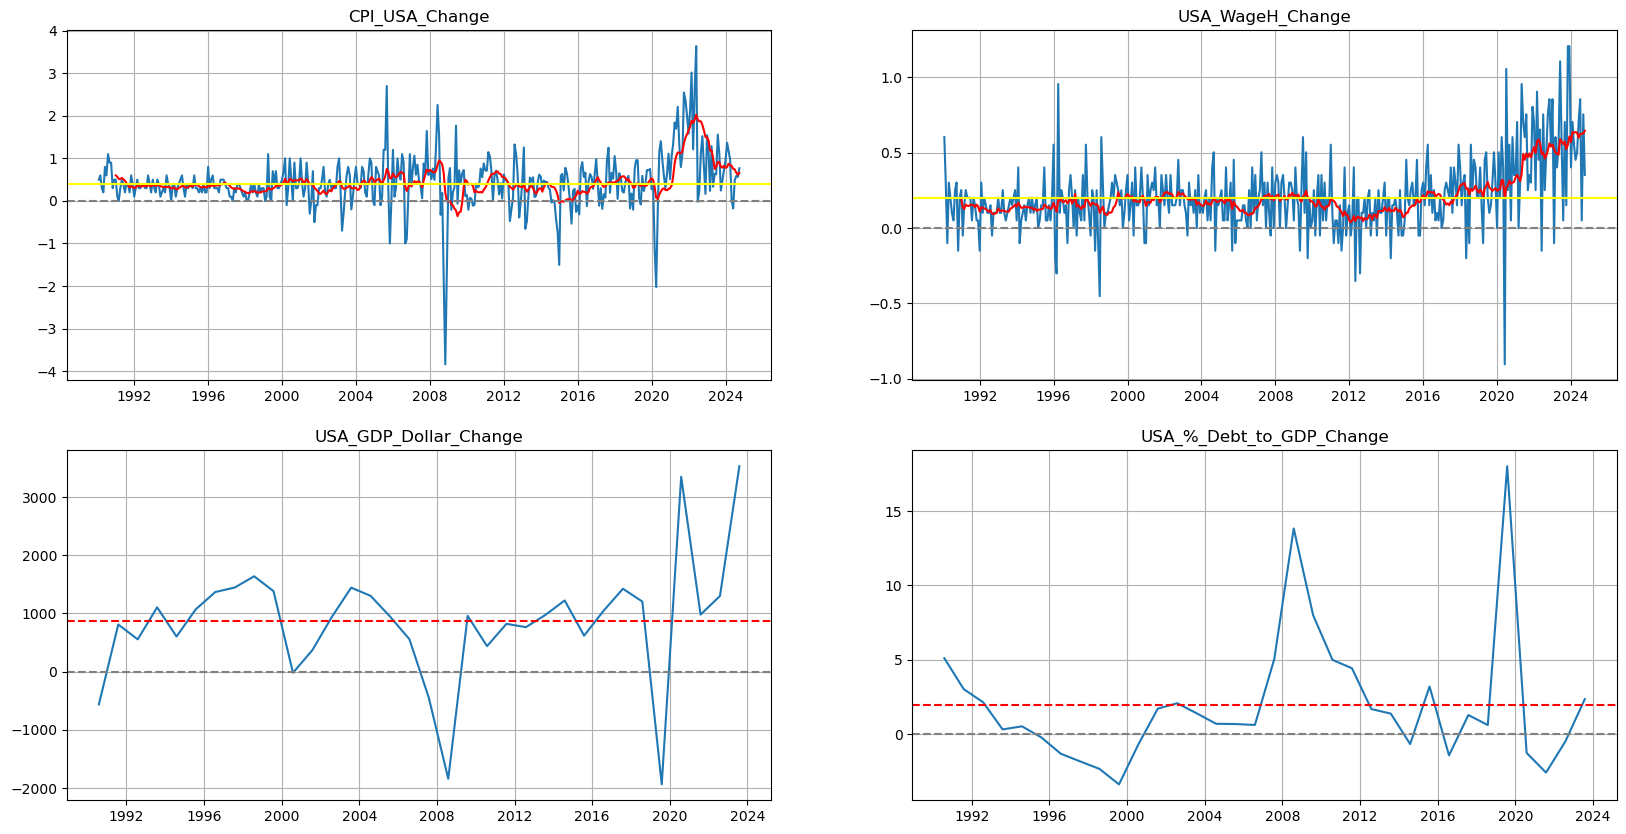

In [99]:
#   Economics with moving averages / means (i take than 1year moving average to avoid a lot of volatility)
fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0,0].plot(country_df2["Date"], country_df2["CPI_USA_Change"].values)
#axs[0,0].plot(country_df2["Date"], country_df2["CPI_USA_Change"].rolling(window=72).mean(),color="yellow")
axs[0,0].plot(country_df2["Date"], country_df2["CPI_USA_Change"].rolling(window=12).mean(),color="red")
axs[0,0].set_title("CPI_USA_Change")
axs[0,0].axhline(y=0, color="grey", linestyle="--")
axs[0,0].axhline(y=country_df2["CPI_USA_Change"].median(), color="yellow")

axs[0,0].grid(True)
axs[0,1].plot(country_df2["Date"], country_df2[["USA_WageH_Change"]].values)
#axs[0,1].plot(country_df2["Date"], country_df2["USA_WageH_Change"].rolling(window=72).mean(),color="yellow")
axs[0,1].plot(country_df2["Date"], country_df2["USA_WageH_Change"].rolling(window=12).mean(),color="red")
axs[0,1].set_title("USA_WageH_Change")
axs[0,1].axhline(y=0, color="grey", linestyle="--")
axs[0,1].axhline(y=country_df2["USA_WageH_Change"].median(), color="yellow")
axs[0,1].grid(True)
axs[1,0].plot(country_df2["Date"][7:].iloc[::12][:-1], country_df2["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].values)
axs[1,0].set_title("USA_GDP_Dollar_Change")
axs[1,0].axhline(y=country_df2["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].mean(), color="red", linestyle="--")
axs[1,0].axhline(y=0, color="grey", linestyle="--")
axs[1,0].grid(True)
axs[1,1].plot(country_df2["Date"][7:].iloc[::12][:-1], country_df2["USA_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].values)
axs[1,1].set_title("USA_%_Debt_to_GDP_Change")
axs[1,1].axhline(y=0, color="grey", linestyle="--")
axs[1,1].axhline(y=country_df2["USA_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].mean(), color="red", linestyle="--")
axs[1,1].grid(True)


In [100]:
country_df2["CPI_USA_Change"].median()

0.4000000000000057

In [101]:
country_df2["CPI_USA_Change"].std()

0.626417197815084

In [102]:
def indexing_1(x):
    if abs(x - country_df2["CPI_USA_Change"].median()) >= country_df2["CPI_USA_Change"].std():
        return -1
    else:
        return 0

def indexing_2(x):
    if abs(x - country_df2["USA_WageH_Change"].median()) >= country_df2["USA_WageH_Change"].std():
        return -1
    else:
        return 0
    
def indexing_3(x):
    if x <= 0:
        return -2
    if 0 < x <= country_df2["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].mean():
        return -1
    else:
        return 0
    
def indexing_4(x):
    if x >= country_df2["USA_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].mean():
        return -2
    if 0 < x <= country_df2["USA_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].mean():
        return -1
    else:
        return 0

In [103]:

country_df2["USA_WageH_Change"].apply(indexing_2)

Date
1990-01-01    0
1990-02-01   -1
1990-03-01    0
1990-04-01   -1
1990-05-01    0
             ..
2024-06-01   -1
2024-07-01   -1
2024-08-01    0
2024-09-01   -1
2024-10-01    0
Name: USA_WageH_Change, Length: 418, dtype: int64

<Axes: xlabel='Date'>

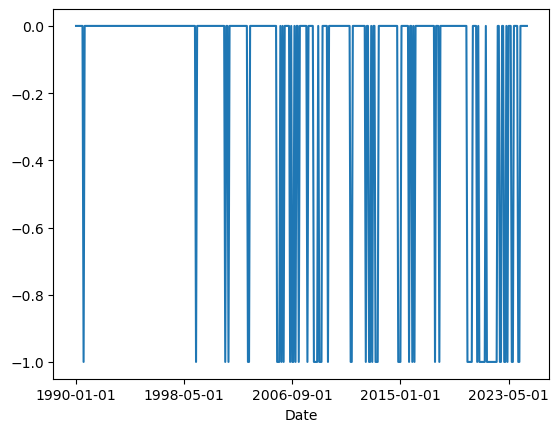

In [104]:
country_df2["CPI_USA_Change"].apply(indexing_1).plot()

<Axes: xlabel='Date'>

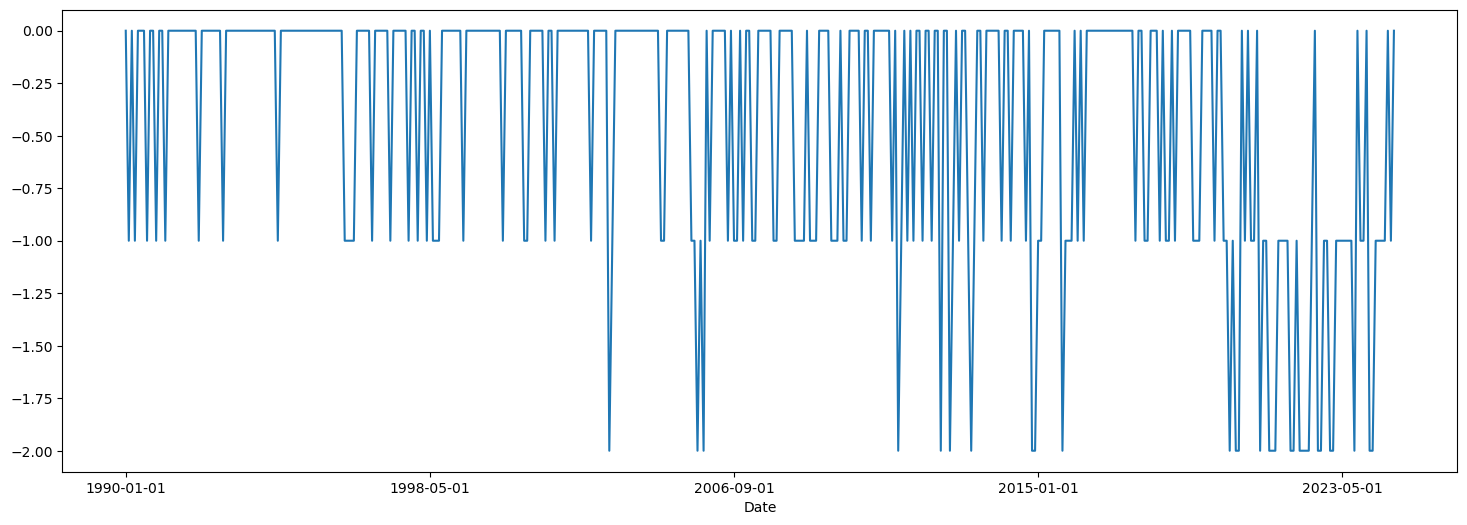

In [105]:
(country_df2["CPI_USA_Change"].apply(indexing_1)+country_df2["USA_WageH_Change"].apply(indexing_2)).plot(figsize=(18,6))

In [106]:
country_df2["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].mean()


863.2039467281352

<Axes: xlabel='Date'>

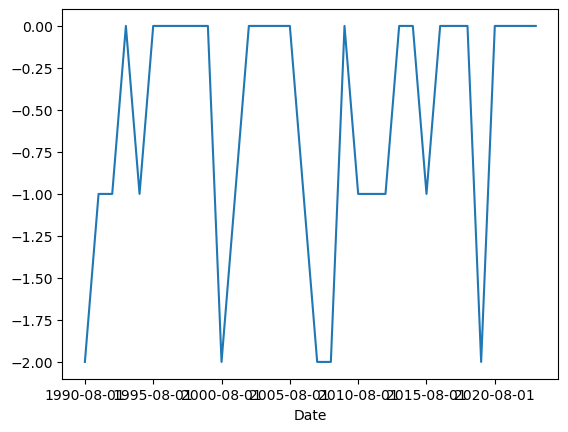

In [107]:
country_df2["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].apply(indexing_3).plot()

<Axes: xlabel='Date'>

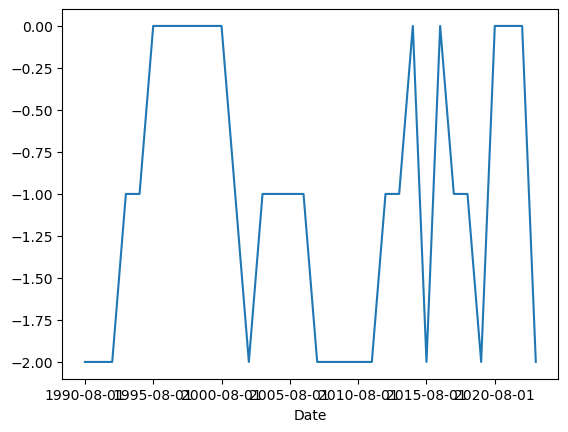

In [108]:
country_df2["USA_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].apply(indexing_4).plot()

In [109]:
#   after looking at the data and researching the market, in 2015, i take a peak in USA % Debt GDP not correct here, so i reduce the value form -2 to -1 

In [110]:
corrected_Debt_GDP = country_df2["USA_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].apply(indexing_4)
corrected_Debt_GDP.loc["2015-08-01"] = -1
corrected_Debt_GDP[23:27]

Date
2013-08-01   -1
2014-08-01    0
2015-08-01   -1
2016-08-01    0
Name: USA_%_Debt_to_GDP_Change, dtype: int64

In [111]:
country_index_usa = pd.concat([country_df2["CPI_USA_Change"].apply(indexing_1), country_df2["USA_WageH_Change"].apply(indexing_2), country_df2["USA_GDP_Dollar_Change"][7:].iloc[::12][:-1].apply(indexing_3), corrected_Debt_GDP], axis=1)

In [112]:
country_index_usa.tail(40)

CPI_USA_Change  USA_WageH_Change  USA_GDP_Dollar_Change  \
Date                                                                  
2021-07-01              -1                -1                    NaN   
2021-08-01               0                -1                    0.0   
2021-09-01              -1                 0                    NaN   
2021-10-01              -1                 0                    NaN   
2021-11-01              -1                 0                    NaN   
2021-12-01              -1                -1                    NaN   
2022-01-01              -1                -1                    NaN   
2022-02-01              -1                 0                    NaN   
2022-03-01              -1                -1                    NaN   
2022-04-01              -1                -1                    NaN   
2022-05-01              -1                -1                    NaN   
2022-06-01              -1                -1                    NaN   
2022-07-01               0                -1                    NaN   
2022-08-01               0                 0                    0.0   
2022-09-01              -1                -1                    NaN   
2022-10-01              -1                -1                    NaN   
2022-11-01               0                -1                    NaN   
2022-12-01               0                -1                    NaN   
2023-01-01              -1                -1                    NaN   
2023-02-01              -1                -1                    NaN   
2023-03-01               0                -1                    NaN   
2023-04-01              -1                 0                    NaN   
2023-05-01               0                -1                    NaN   
2023-06-01               0                -1                    NaN   
2023-07-01               0                -1                    NaN   
2023-08-01              -1                 0                    0.0   
2023-09-01              -1                -1                    NaN   
2023-10-01               0                 0                    NaN   
2023-11-01               0                -1                    NaN   
2023-12-01               0                -1                    NaN   
2024-01-01               0                 0                    NaN   
2024-02-01              -1                -1                    NaN   
2024-03-01              -1                -1                    NaN   
2024-04-01               0                -1                    NaN   
2024-05-01               0                -1                    NaN   
2024-06-01               0                -1                    NaN   
2024-07-01               0                -1                    NaN   
2024-08-01               0                 0                    NaN   
2024-09-01               0                -1                    NaN   
2024-10-01               0                 0                    NaN   

            USA_%_Debt_to_GDP_Change  
Date                                  
2021-07-01                       NaN  
2021-08-01                       0.0  
2021-09-01                       NaN  
2021-10-01                       NaN  
2021-11-01                       NaN  
2021-12-01                       NaN  
2022-01-01                       NaN  
2022-02-01                       NaN  
2022-03-01                       NaN  
2022-04-01                       NaN  
2022-05-01                       NaN  
2022-06-01                       NaN  
2022-07-01                       NaN  
2022-08-01                       0.0  
2022-09-01                       NaN  
2022-10-01                       NaN  
2022-11-01                       NaN  
2022-12-01                       NaN  
2023-01-01                       NaN  
2023-02-01                       NaN  
2023-03-01                       NaN  
2023-04-01                       NaN  
2023-05-01                       NaN  
2023-06-01                       NaN  
2023-07-01     

In [113]:
country_index_usa.dtypes

CPI_USA_Change                int64
USA_WageH_Change              int64
USA_GDP_Dollar_Change       float64
USA_%_Debt_to_GDP_Change    float64
dtype: object

In [114]:
#country_index["USA_GDP_Dollar_Change"][0] = -2
#country_index["USA_GDP_Dollar_Change"][-1] = 0

In [115]:
#country_index["USA_GDP_Dollar_Change"] = pd.to_numeric(country_index["USA_GDP_Dollar_Change"],errors="coerce")
#country_index["USA_GDP_Dollar_Change"].head(15)

In [116]:
country_index_usa["USA_GDP_Dollar_Change"] = country_index_usa["USA_GDP_Dollar_Change"].shift(periods=-7).fillna(method="ffill")

C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\3511886944.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_index_usa["USA_GDP_Dollar_Change"] = country_index_usa["USA_GDP_Dollar_Change"].shift(periods=-7).fillna(method="ffill")


In [117]:
country_index_usa["USA_GDP_Dollar_Change"]

Date
1990-01-01   -2.0
1990-02-01   -2.0
1990-03-01   -2.0
1990-04-01   -2.0
1990-05-01   -2.0
             ... 
2024-06-01    0.0
2024-07-01    0.0
2024-08-01    0.0
2024-09-01    0.0
2024-10-01    0.0
Name: USA_GDP_Dollar_Change, Length: 418, dtype: float64

In [118]:
country_index_usa["USA_%_Debt_to_GDP_Change"] = country_index_usa["USA_%_Debt_to_GDP_Change"].shift(periods=-7).fillna(method="ffill")

C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\118108584.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_index_usa["USA_%_Debt_to_GDP_Change"] = country_index_usa["USA_%_Debt_to_GDP_Change"].shift(periods=-7).fillna(method="ffill")


In [119]:
country_index_usa["USA_%_Debt_to_GDP_Change"].tail(40)

Date
2021-07-01    0.0
2021-08-01    0.0
2021-09-01    0.0
2021-10-01    0.0
2021-11-01    0.0
2021-12-01    0.0
2022-01-01    0.0
2022-02-01    0.0
2022-03-01    0.0
2022-04-01    0.0
2022-05-01    0.0
2022-06-01    0.0
2022-07-01    0.0
2022-08-01    0.0
2022-09-01    0.0
2022-10-01    0.0
2022-11-01    0.0
2022-12-01    0.0
2023-01-01   -2.0
2023-02-01   -2.0
2023-03-01   -2.0
2023-04-01   -2.0
2023-05-01   -2.0
2023-06-01   -2.0
2023-07-01   -2.0
2023-08-01   -2.0
2023-09-01   -2.0
2023-10-01   -2.0
2023-11-01   -2.0
2023-12-01   -2.0
2024-01-01   -2.0
2024-02-01   -2.0
2024-03-01   -2.0
2024-04-01   -2.0
2024-05-01   -2.0
2024-06-01   -2.0
2024-07-01   -2.0
2024-08-01   -2.0
2024-09-01   -2.0
2024-10-01   -2.0
Name: USA_%_Debt_to_GDP_Change, dtype: float64

In [120]:
country_index_usa

CPI_USA_Change  USA_WageH_Change  USA_GDP_Dollar_Change  \
Date                                                                  
1990-01-01               0                 0                   -2.0   
1990-02-01               0                -1                   -2.0   
1990-03-01               0                 0                   -2.0   
1990-04-01               0                -1                   -2.0   
1990-05-01               0                 0                   -2.0   
...                    ...               ...                    ...   
2024-06-01               0                -1                    0.0   
2024-07-01               0                -1                    0.0   
2024-08-01               0                 0                    0.0   
2024-09-01               0                -1                    0.0   
2024-10-01               0                 0                    0.0   

            USA_%_Debt_to_GDP_Change  
Date                                  
1990-01-01                      -2.0  
1990-02-01                      -2.0  
1990-03-01                      -2.0  
1990-04-01                      -2.0  
1990-05-01                      -2.0  
...                              ...  
2024-06-01                      -2.0  
2024-07-01                      -2.0  
2024-08-01                      -2.0  
2024-09-01                      -2.0  
2024-10-01                      -2.0  

[418 rows x 4 columns]

In [121]:
country_index_usa["total"] = country_index_usa["CPI_USA_Change"] + country_index_usa["USA_WageH_Change"] + country_index_usa["USA_GDP_Dollar_Change"] + country_index_usa["USA_%_Debt_to_GDP_Change"]

In [122]:
country_index_usa["USA_%_Debt_to_GDP_Change"].sum()

-428.0

<Axes: xlabel='Date'>

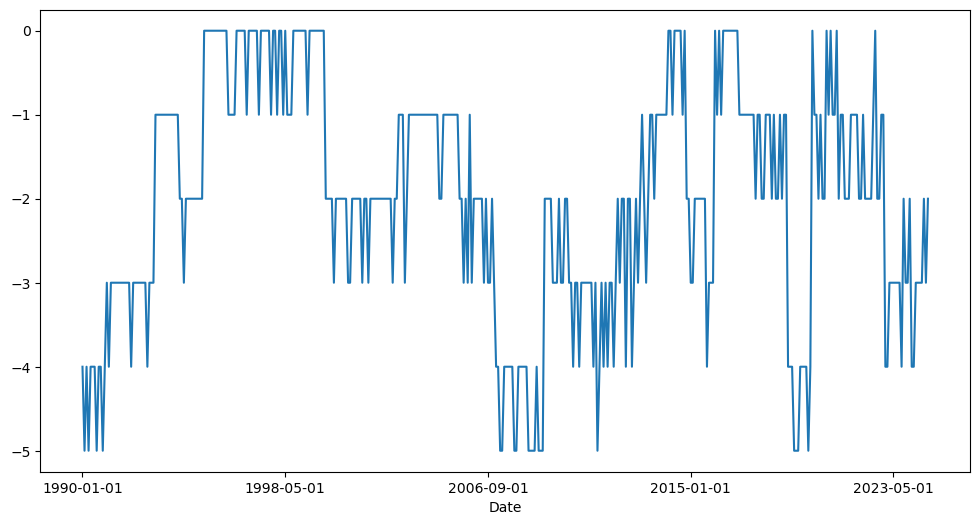

In [123]:
country_index_usa["total"].plot(figsize=(12,6))

#   Deep Analysis Japan

In [124]:
#   here only copa - paste...

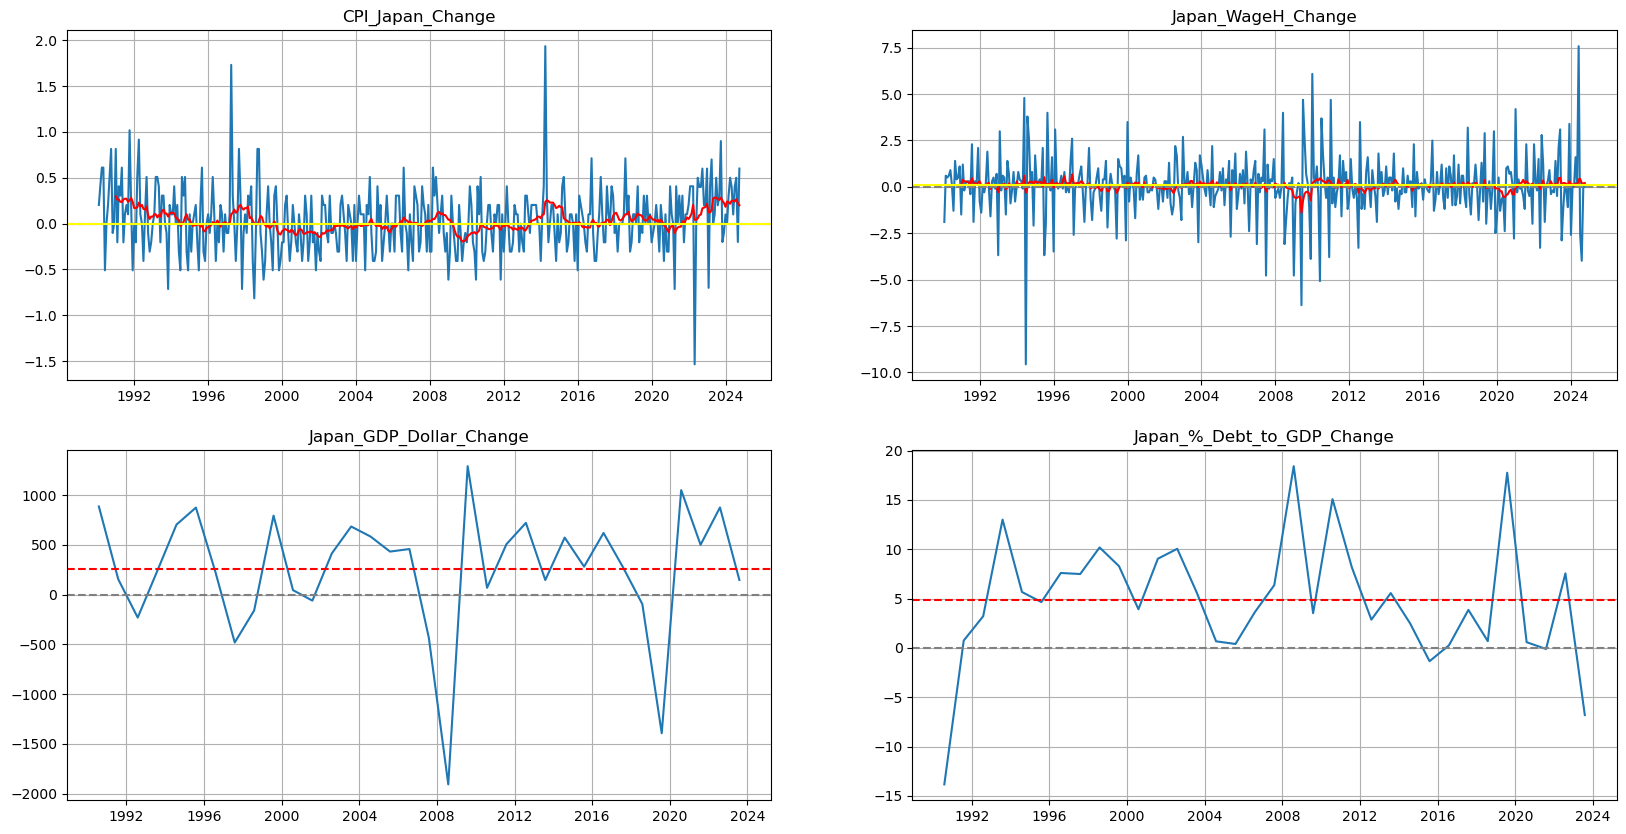

In [125]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0,0].plot(country_df2["Date"], country_df2["CPI_Japan_Change"].values)
#axs[0,0].plot(country_df2["Date"], country_df2["CPI_Japan_Change"].rolling(window=72).mean(),color="yellow")
axs[0,0].plot(country_df2["Date"], country_df2["CPI_Japan_Change"].rolling(window=12).mean(),color="red")
axs[0,0].set_title("CPI_Japan_Change")
axs[0,0].axhline(y=0, color="grey", linestyle="--")
axs[0,0].axhline(y=country_df2["CPI_Japan_Change"].median(), color="yellow")

axs[0,0].grid(True)
axs[0,1].plot(country_df2["Date"], country_df2[["Japan_WageH_Change"]].values)
#axs[0,1].plot(country_df2["Date"], country_df2["Japan_WageH_Change"].rolling(window=72).mean(),color="yellow")
axs[0,1].plot(country_df2["Date"], country_df2["Japan_WageH_Change"].rolling(window=12).mean(),color="red")
axs[0,1].set_title("Japan_WageH_Change")
axs[0,1].axhline(y=0, color="grey", linestyle="--")
axs[0,1].axhline(y=country_df2["Japan_WageH_Change"].median(), color="yellow")
axs[0,1].grid(True)
axs[1,0].plot(country_df2["Date"][7:].iloc[::12][:-1], country_df2["Japan_GDP_Dollar_Change"][7:].iloc[::12][:-1].values)
axs[1,0].set_title("Japan_GDP_Dollar_Change")
axs[1,0].axhline(y=country_df2["Japan_GDP_Dollar_Change"][7:].iloc[::12][:-1].mean(), color="red", linestyle="--")
axs[1,0].axhline(y=0, color="grey", linestyle="--")
axs[1,0].grid(True)
axs[1,1].plot(country_df2["Date"][7:].iloc[::12][:-1], country_df2["Japan_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].values)
axs[1,1].set_title("Japan_%_Debt_to_GDP_Change")
axs[1,1].axhline(y=0, color="grey", linestyle="--")
axs[1,1].axhline(y=country_df2["Japan_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].mean(), color="red", linestyle="--")
axs[1,1].grid(True)


In [126]:
#   as we see the mean of CPI - japan and Wages Japan are actually near zero, which is actually bad. Resulting in deflation

In [127]:
def indexing_1(x):
    if abs(x - country_df2["CPI_Japan_Change"].median()) >= country_df2["CPI_Japan_Change"].std():
        return -1
    else:
        return 0

def indexing_2(x):
    if abs(x - country_df2["Japan_WageH_Change"].median()) >= country_df2["Japan_WageH_Change"].std():
        return -1
    else:
        return 0
    
def indexing_3(x):
    if x <= 0:
        return -2
    if 0 < x <= country_df2["Japan_GDP_Dollar_Change"][7:].iloc[::12][:-1].mean():
        return -1
    else:
        return 0
    
def indexing_4(x):
    if x >= country_df2["Japan_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].mean():
        return -2
    if 0 < x <= country_df2["Japan_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].mean():
        return -1
    else:
        return 0

C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\582747268.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_index_japan["Japan_GDP_Dollar_Change"] = country_index_japan["Japan_GDP_Dollar_Change"].shift(periods=-7).fillna(method="ffill")
C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\582747268.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_index_japan["Japan_%_Debt_to_GDP_Change"] = country_index_japan["Japan_%_Debt_to_GDP_Change"].shift(periods=-7).fillna(method="ffill")


<Axes: xlabel='Date'>

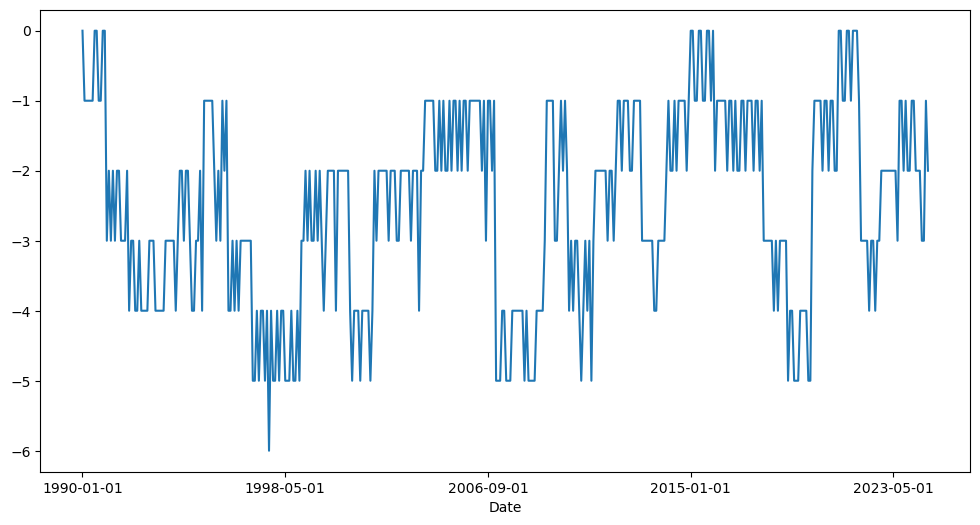

In [128]:
country_index_japan = pd.concat([country_df2["CPI_Japan_Change"].apply(indexing_1), country_df2["Japan_WageH_Change"].apply(indexing_2), country_df2["Japan_GDP_Dollar_Change"][7:].iloc[::12][:-1].apply(indexing_3), country_df2["Japan_%_Debt_to_GDP_Change"][7:].iloc[::12][:-1].apply(indexing_4)], axis=1)

country_index_japan["Japan_GDP_Dollar_Change"] = country_index_japan["Japan_GDP_Dollar_Change"].shift(periods=-7).fillna(method="ffill")

country_index_japan["Japan_%_Debt_to_GDP_Change"] = country_index_japan["Japan_%_Debt_to_GDP_Change"].shift(periods=-7).fillna(method="ffill")

country_index_japan["total"] = country_index_japan["CPI_Japan_Change"] + country_index_japan["Japan_WageH_Change"] + country_index_japan["Japan_GDP_Dollar_Change"] + country_index_japan["Japan_%_Debt_to_GDP_Change"]

country_index_japan["total"].plot(figsize=(12,6))

In [129]:
#   i choose to remove the "lets call it" outlier, because it is only one value but it makes comparison with usa a bit more difficult

In [130]:
country_index_japan.loc["1997-09-01", "CPI_Japan_Change"] = 0
country_index_japan.loc["1997-09-01", "total"] = -5

In [131]:
country_index_japan.loc["1997-09-01"][0]
country_index_japan.loc["1997-09-01", "total"]

C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\2236120626.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  country_index_japan.loc["1997-09-01"][0]


-5.0

In [132]:
country_index_usa["Date"] = country_index_usa.index
country_index_usa["Date"] = pd.to_datetime(country_index_usa["Date"])
country_index_japan["Date"] = country_index_japan.index
country_index_japan["Date"] = pd.to_datetime(country_index_japan["Date"])

Text(0.5, 1.0, 'Japan_index')

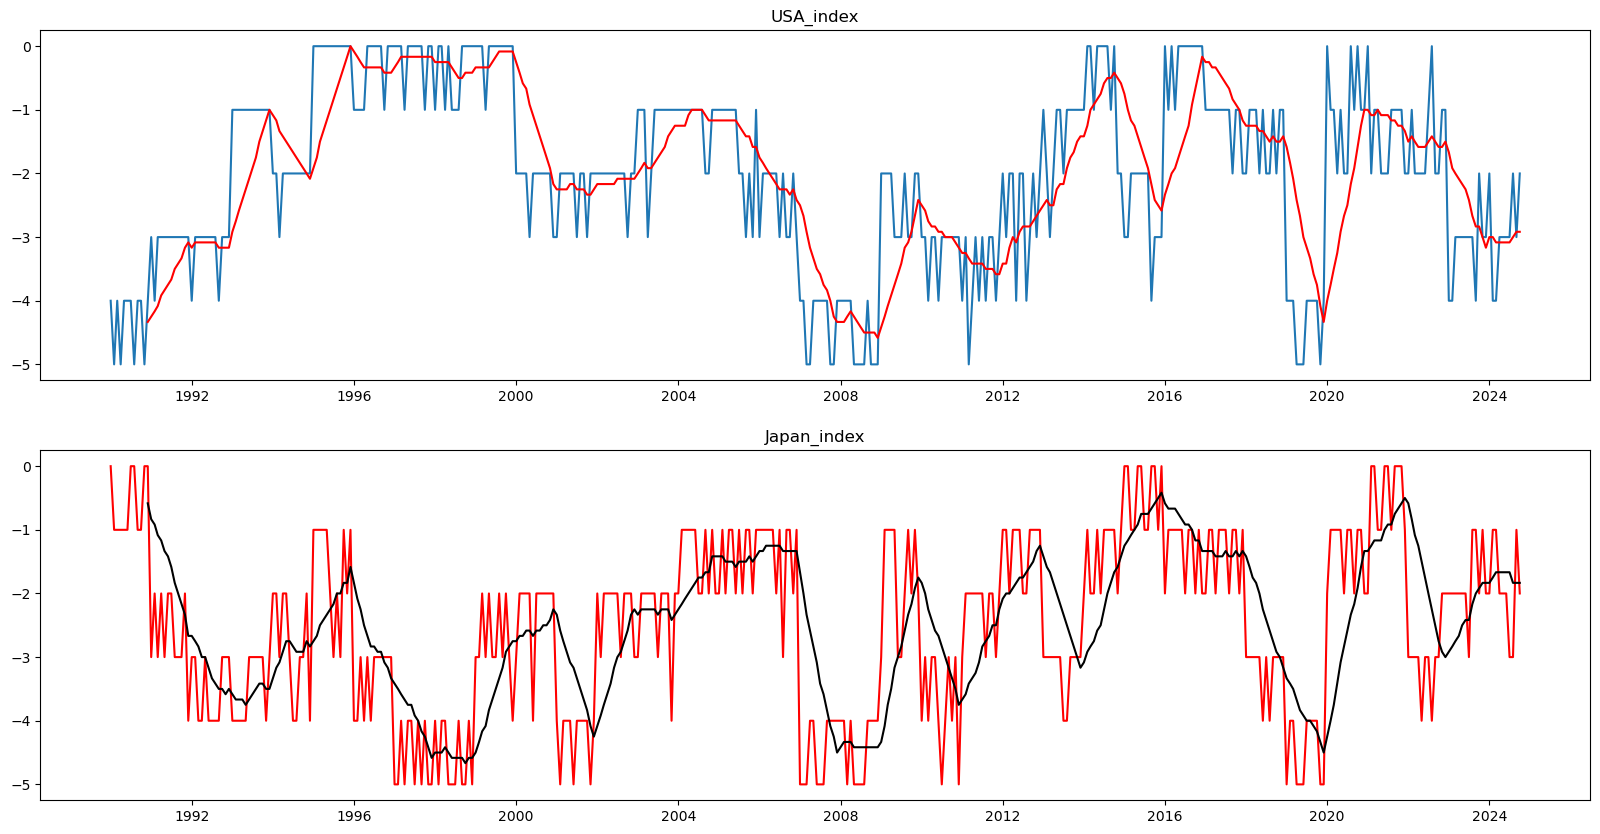

In [133]:
#   one to another:
fig, axs = plt.subplots(2,1, figsize=(20,10))
axs[0].plot(country_index_usa["Date"], country_index_usa["total"])
axs[0].plot(country_index_usa["Date"], country_index_usa["total"].rolling(window=12).mean(),color="red")
axs[0].set_title("USA_index")

axs[1].plot(country_index_japan["Date"], country_index_japan["total"], color="red")
axs[1].plot(country_index_japan["Date"], country_index_japan["total"].rolling(window=12).mean(),color="black")
axs[1].set_title("Japan_index")




#   PCA

In [134]:
#   introducing PCA

In [135]:
from sklearn.decomposition import PCA

In [136]:
#   on nominal data

In [137]:
#   1. scaling

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
usa_df_scaled = scaler.fit_transform(country_df_true[['CPI_USA_Index', 'USA_WageH_Dollar',
       'USA_GDP_Dollar_Capita', 'USA_%_Debt_to_GDP']])
usa_df_scaled
japan_df_scaled = scaler.fit_transform(country_df_true[['CPI_Japan_Index',
       'Japan_WageH_Dollar',
       'Japan_GDP_Dollar_Capita',
       'Japan_%_Debt_to_GDP']])
japan_df_scaled

array([[-2.8963309 , -2.53183886, -1.89605474, -1.45335392],
       [-2.81423803, -2.84731481, -1.89605474, -1.45335392],
       [-2.65005228, -2.74768995, -1.89605474, -1.45335392],
       ...,
       [ 3.49192092,  1.78520628,  1.7625805 ,  1.30312778],
       [ 3.4112852 ,  1.78520628,  1.7625805 ,  1.30312778],
       [ 3.65319237,  1.78520628,  1.7625805 ,  1.30312778]])

In [139]:
pca = PCA(n_components=1)

In [140]:
usa_df_scaled_pcaed = pca.fit_transform(usa_df_scaled)
japan_df_scaled_pcaed = pca.fit_transform(japan_df_scaled)

In [141]:
usa_df_scaled_pcaed

array([[-3.02062925],
       [-3.00151384],
       [-2.98825815],
       [-2.98739388],
       [-2.97836456],
       [-2.96530137],
       [-2.95665659],
       [-2.87653501],
       [-2.86126261],
       [-2.84483731],
       [-2.84512594],
       [-2.83523236],
       [-2.82418587],
       [-2.82428223],
       [-2.82082399],
       [-2.81189058],
       [-2.80199699],
       [-2.79315994],
       [-2.78643596],
       [-2.66865013],
       [-2.65981307],
       [-2.65424176],
       [-2.64674988],
       [-2.64137107],
       [-2.64377277],
       [-2.63368669],
       [-2.62609844],
       [-2.61831793],
       [-2.61169008],
       [-2.6051586 ],
       [-2.59862689],
       [-2.51363509],
       [-2.51161839],
       [-2.5029736 ],
       [-2.49644212],
       [-2.49202348],
       [-2.48212989],
       [-2.47665472],
       [-2.47223631],
       [-2.46118982],
       [-2.45465834],
       [-2.4524489 ],
       [-2.44803049],
       [-2.36497891],
       [-2.35825493],
       [-2

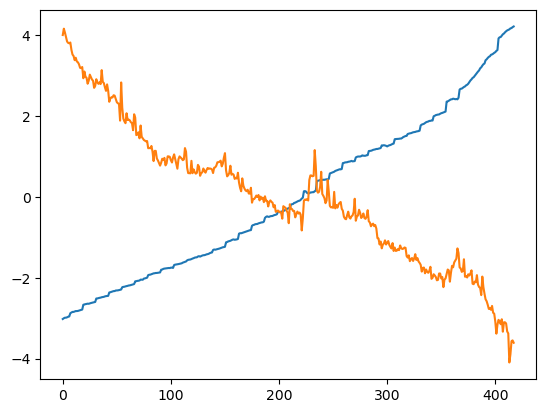

In [142]:
plt.plot(usa_df_scaled_pcaed)
plt.plot(japan_df_scaled_pcaed)

In [143]:
#    scaling and reducing change-data

In [144]:
country_df1

Date  CPI_USA_Change  CPI_Japan_Change  USA_WageH_Change  \
Date                                                                        
1990-01-01 1990-01-01             NaN               NaN               NaN   
1990-02-01 1990-02-01           0.500          0.203614           0.60291   
1990-03-01 1990-03-01           0.600          0.407228           0.30146   
1990-04-01 1990-04-01           0.300          0.610842          -0.10048   
1990-05-01 1990-05-01           0.200          0.610842           0.30145   
...               ...             ...               ...               ...   
2024-06-01 2024-06-01          -0.176          0.100000           0.70340   
2024-07-01 2024-07-01           0.485          0.400000           0.85420   
2024-08-01 2024-08-01           0.587          0.500000           0.05020   
2024-09-01 2024-09-01           0.565         -0.200000           0.75370   
2024-10-01 2024-10-01           0.768          0.600000           0.35170   

            Japan_WageH_Change  USA_GDP_Dollar_Change  \
Date                                                    
1990-01-01                 NaN                    NaN   
1990-02-01            -1.89384                    0.0   
1990-03-01             0.59806                    0.0   
1990-04-01             0.49838                    0.0   
1990-05-01             0.59805                    0.0   
...                        ...                    ...   
2024-06-01             7.57540                    0.0   
2024-07-01            -2.59160                    0.0   
2024-08-01            -3.98710                    0.0   
2024-09-01             0.00000                    0.0   
2024-10-01             0.00000                    0.0   

            Japan_GDP_Dollar_Change  USA_Debt_Change  Japan_Debt_Change  \
Date                                                                      
1990-01-01                      NaN              NaN                NaN   
1990-02-01                      0.0              0.0                0.0   
1990-03-01                      0.0              0.0                0.0   
1990-04-01                      0.0              0.0                0.0   
1990-05-01                      0.0              0.0                0.0   
...                             ...              ...                ...   
2024-06-01                      0.0              0.0                0.0   
2024-07-01                      0.0              0.0                0.0   
2024-08-01                      0.0              0.0                0.0   
2024-09-01                      0.0              0.0                0.0   
2024-10-01                      0.0              0.0                0.0   

            USA_%_Debt_to_GDP_Change  Japan_%_Debt_to_GDP_Change  
Date                                                              
1990-01-01                       NaN                         NaN  
1990-02-01                       0.0                         0.0  
1990-03-01                       0.0                         0.0  
1990-04-01                       0.0                         0.0  
1990-05-01                       0.0                         0.0  
...                              ...                         ...  
2024-06-01                       0.0                         0.0  
2024-07-01                       0.0                         0.0  
2024-08-01                       0.0                         0.0  
2024-09-01                       0.0                         0.0  
2024-10-01                       0.0                         0.0  

[418 rows x 11 columns]

In [145]:
country_df1_ml = country_df1.fillna(method="bfill")
country_df1_ml

C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\727839375.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_df1_ml = country_df1.fillna(method="bfill")


Date  CPI_USA_Change  CPI_Japan_Change  USA_WageH_Change  \
Date                                                                        
1990-01-01 1990-01-01           0.500          0.203614           0.60291   
1990-02-01 1990-02-01           0.500          0.203614           0.60291   
1990-03-01 1990-03-01           0.600          0.407228           0.30146   
1990-04-01 1990-04-01           0.300          0.610842          -0.10048   
1990-05-01 1990-05-01           0.200          0.610842           0.30145   
...               ...             ...               ...               ...   
2024-06-01 2024-06-01          -0.176          0.100000           0.70340   
2024-07-01 2024-07-01           0.485          0.400000           0.85420   
2024-08-01 2024-08-01           0.587          0.500000           0.05020   
2024-09-01 2024-09-01           0.565         -0.200000           0.75370   
2024-10-01 2024-10-01           0.768          0.600000           0.35170   

            Japan_WageH_Change  USA_GDP_Dollar_Change  \
Date                                                    
1990-01-01            -1.89384                    0.0   
1990-02-01            -1.89384                    0.0   
1990-03-01             0.59806                    0.0   
1990-04-01             0.49838                    0.0   
1990-05-01             0.59805                    0.0   
...                        ...                    ...   
2024-06-01             7.57540                    0.0   
2024-07-01            -2.59160                    0.0   
2024-08-01            -3.98710                    0.0   
2024-09-01             0.00000                    0.0   
2024-10-01             0.00000                    0.0   

            Japan_GDP_Dollar_Change  USA_Debt_Change  Japan_Debt_Change  \
Date                                                                      
1990-01-01                      0.0              0.0                0.0   
1990-02-01                      0.0              0.0                0.0   
1990-03-01                      0.0              0.0                0.0   
1990-04-01                      0.0              0.0                0.0   
1990-05-01                      0.0              0.0                0.0   
...                             ...              ...                ...   
2024-06-01                      0.0              0.0                0.0   
2024-07-01                      0.0              0.0                0.0   
2024-08-01                      0.0              0.0                0.0   
2024-09-01                      0.0              0.0                0.0   
2024-10-01                      0.0              0.0                0.0   

            USA_%_Debt_to_GDP_Change  Japan_%_Debt_to_GDP_Change  
Date                                                              
1990-01-01                       0.0                         0.0  
1990-02-01                       0.0                         0.0  
1990-03-01                       0.0                         0.0  
1990-04-01                       0.0                         0.0  
1990-05-01                       0.0                         0.0  
...                              ...                         ...  
2024-06-01                       0.0                         0.0  
2024-07-01                       0.0                         0.0  
2024-08-01                       0.0                         0.0  
2024-09-01                       0.0                         0.0  
2024-10-01                       0.0                         0.0  

[418 rows x 11 columns]

In [146]:
def zero_changer(x):
    if x == 0:
        return None
    else:
        return x

In [147]:
country_df1_ml["USA_GDP_Dollar_Change"] = country_df1_ml["USA_GDP_Dollar_Change"].apply(zero_changer).interpolate(method="linear")
country_df1_ml["USA_GDP_Dollar_Change"] = country_df1_ml["USA_GDP_Dollar_Change"].fillna(method="bfill")

country_df1_ml["Japan_GDP_Dollar_Change"] = country_df1_ml["Japan_GDP_Dollar_Change"].apply(zero_changer).interpolate(method="linear")
country_df1_ml["Japan_GDP_Dollar_Change"] = country_df1_ml["Japan_GDP_Dollar_Change"].fillna(method="bfill")

country_df1_ml["USA_Debt_Change"] = country_df1_ml["USA_Debt_Change"].apply(zero_changer).interpolate(method="linear")
country_df1_ml["USA_Debt_Change"] = country_df1_ml["USA_Debt_Change"].fillna(method="bfill")

country_df1_ml["Japan_Debt_Change"] = country_df1_ml["Japan_Debt_Change"].apply(zero_changer).interpolate(method="linear")
country_df1_ml["Japan_Debt_Change"] = country_df1_ml["Japan_Debt_Change"].fillna(method="bfill")

country_df1_ml["USA_%_Debt_to_GDP_Change"] = country_df1_ml["USA_%_Debt_to_GDP_Change"].apply(zero_changer).interpolate(method="linear")
country_df1_ml["USA_%_Debt_to_GDP_Change"] = country_df1_ml["USA_%_Debt_to_GDP_Change"].fillna(method="bfill")

country_df1_ml["Japan_%_Debt_to_GDP_Change"] = country_df1_ml["Japan_%_Debt_to_GDP_Change"].apply(zero_changer).interpolate(method="linear")
country_df1_ml["Japan_%_Debt_to_GDP_Change"] = country_df1_ml["Japan_%_Debt_to_GDP_Change"].fillna(method="bfill")


C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\3947900921.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_df1_ml["USA_GDP_Dollar_Change"] = country_df1_ml["USA_GDP_Dollar_Change"].fillna(method="bfill")
C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\3947900921.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_df1_ml["Japan_GDP_Dollar_Change"] = country_df1_ml["Japan_GDP_Dollar_Change"].fillna(method="bfill")
C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\3947900921.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_df1_ml["USA_Debt_Change"] = country_df1_ml["USA_Debt_Change"].fillna(method="bfill")
C:\Users\V. Stasiunaitis\AppData\Local\Temp\ipykernel_9228\3

In [148]:
country_df1_ml

Date  CPI_USA_Change  CPI_Japan_Change  USA_WageH_Change  \
Date                                                                        
1990-01-01 1990-01-01           0.500          0.203614           0.60291   
1990-02-01 1990-02-01           0.500          0.203614           0.60291   
1990-03-01 1990-03-01           0.600          0.407228           0.30146   
1990-04-01 1990-04-01           0.300          0.610842          -0.10048   
1990-05-01 1990-05-01           0.200          0.610842           0.30145   
...               ...             ...               ...               ...   
2024-06-01 2024-06-01          -0.176          0.100000           0.70340   
2024-07-01 2024-07-01           0.485          0.400000           0.85420   
2024-08-01 2024-08-01           0.587          0.500000           0.05020   
2024-09-01 2024-09-01           0.565         -0.200000           0.75370   
2024-10-01 2024-10-01           0.768          0.600000           0.35170   

            Japan_WageH_Change  USA_GDP_Dollar_Change  \
Date                                                    
1990-01-01            -1.89384            -562.225997   
1990-02-01            -1.89384            -562.225997   
1990-03-01             0.59806            -562.225997   
1990-04-01             0.49838            -562.225997   
1990-05-01             0.59805            -562.225997   
...                        ...                    ...   
2024-06-01             7.57540            3528.647071   
2024-07-01            -2.59160            3528.647071   
2024-08-01            -3.98710            3528.647071   
2024-09-01             0.00000            3528.647071   
2024-10-01             0.00000            3528.647071   

            Japan_GDP_Dollar_Change  USA_Debt_Change  Japan_Debt_Change  \
Date                                                                      
1990-01-01               886.060969     4.319899e+02            -523.27   
1990-02-01               886.060969     4.319899e+02            -523.27   
1990-03-01               886.060969     4.319899e+02            -523.27   
1990-04-01               886.060969     4.319899e+02            -523.27   
1990-05-01               886.060969     4.319899e+02            -523.27   
...                             ...              ...                ...   
2024-06-01               147.895280    -1.716908e-07             244.00   
2024-07-01               147.895280    -1.716908e-07             244.00   
2024-08-01               147.895280    -1.716908e-07             244.00   
2024-09-01               147.895280    -1.716908e-07             244.00   
2024-10-01               147.895280    -1.716908e-07             244.00   

            USA_%_Debt_to_GDP_Change  Japan_%_Debt_to_GDP_Change  
Date                                                              
1990-01-01                   5.10125                  -13.836505  
1990-02-01                   5.10125                  -13.836505  
1990-03-01                   5.10125                  -13.836505  
1990-04-01                   5.10125                  -13.836505  
1990-05-01                   5.10125                  -13.836505  
...                              ...                         ...  
2024-06-01                   2.35250                   -6.812186  
2024-07-01                   2.35250                   -6.812186  
2024-08-01                   2.35250                   -6.812186  
2024-09-01                   2.35250                   -6.812186  
2024-10-01                   2.35250                   -6.812186  

[418 rows x 11 columns]

In [149]:
country_df1_ml["USA_%_Debt_to_GDP_Change"]

Date
1990-01-01    5.10125
1990-02-01    5.10125
1990-03-01    5.10125
1990-04-01    5.10125
1990-05-01    5.10125
               ...   
2024-06-01    2.35250
2024-07-01    2.35250
2024-08-01    2.35250
2024-09-01    2.35250
2024-10-01    2.35250
Name: USA_%_Debt_to_GDP_Change, Length: 418, dtype: float64

In [150]:
#   !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [151]:
#   i here invert the % debt to gdp for pca, because the more the percent the worse.. (this could lead to some inaccuracies maybe)

In [152]:
#country_df1_ml["USA_%_Debt_to_GDP_Change"] = abs((country_df1_ml["USA_%_Debt_to_GDP_Change"] - country_df1_ml["USA_%_Debt_to_GDP_Change"].max()))
#country_df1_ml["Japan_%_Debt_to_GDP_Change"] = abs((country_df1_ml["Japan_%_Debt_to_GDP_Change"] - country_df1_ml["Japan_%_Debt_to_GDP_Change"].max()))

In [153]:
country_df1_ml["USA_%_Debt_to_GDP_Change"]

Date
1990-01-01    5.10125
1990-02-01    5.10125
1990-03-01    5.10125
1990-04-01    5.10125
1990-05-01    5.10125
               ...   
2024-06-01    2.35250
2024-07-01    2.35250
2024-08-01    2.35250
2024-09-01    2.35250
2024-10-01    2.35250
Name: USA_%_Debt_to_GDP_Change, Length: 418, dtype: float64

In [154]:
usa_change_scaled = scaler.fit_transform(country_df1_ml[['CPI_USA_Change', 'USA_WageH_Change',
       'USA_GDP_Dollar_Change', 'USA_%_Debt_to_GDP_Change']])
usa_change_scaled
japan_change_scaled = scaler.fit_transform(country_df1_ml[['CPI_Japan_Change',
       'Japan_WageH_Change',
       'Japan_GDP_Dollar_Change',
       'Japan_%_Debt_to_GDP_Change']])
japan_change_scaled

array([[ 0.47045103, -1.1977943 ,  1.24627103, -3.23094254],
       [ 0.47045103, -1.1977943 ,  1.24627103, -3.23094254],
       [ 1.05360037,  0.33183742,  1.24627103, -3.23094254],
       ...,
       [ 1.31929779, -2.48272423, -0.22071596, -1.99639748],
       [-0.68549677, -0.03527665, -0.22071596, -1.99639748],
       [ 1.60569702, -0.03527665, -0.22071596, -1.99639748]])

In [155]:
usa_change_scaled_pcaed = pca.fit_transform(usa_change_scaled)
japan_change_scaled_pcaed = pca.fit_transform(japan_change_scaled)

In [156]:
usa_change_scaled_pcaed = abs((usa_change_scaled_pcaed - usa_change_scaled_pcaed.max()) / 1.75)
japan_change_scaled_pcaed = abs((japan_change_scaled_pcaed - japan_change_scaled_pcaed.max()) / 1.75)

In [157]:
#plt.plot(x=country_df1_ml.index.values, y=usa_change_scaled_pcaed)
#plt.plot(x=country_df1_ml.index.values, y=japan_change_scaled_pcaed)

In [158]:
usa_index_pca = pd.DataFrame(usa_change_scaled_pcaed, index=[country_df1_ml.index], columns=["USA_Index"])
japan_index_pca = pd.DataFrame(japan_change_scaled_pcaed, index=[country_df1_ml.index], columns=["Japan_Index"])

In [159]:
common_index_pca = pd.concat([usa_index_pca, japan_index_pca], axis=1)


In [160]:
common_index_pca["Date"] = country_df1_ml.index.values
common_index_pca["Date"] = pd.to_datetime(common_index_pca["Date"])

common_index_pca.set_index(["Date"], inplace=True)

In [161]:
common_index_pca.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01'],
              dtype='datetime64[ns]', name='Date', length=418, freq=None)

<Axes: xlabel='Date'>

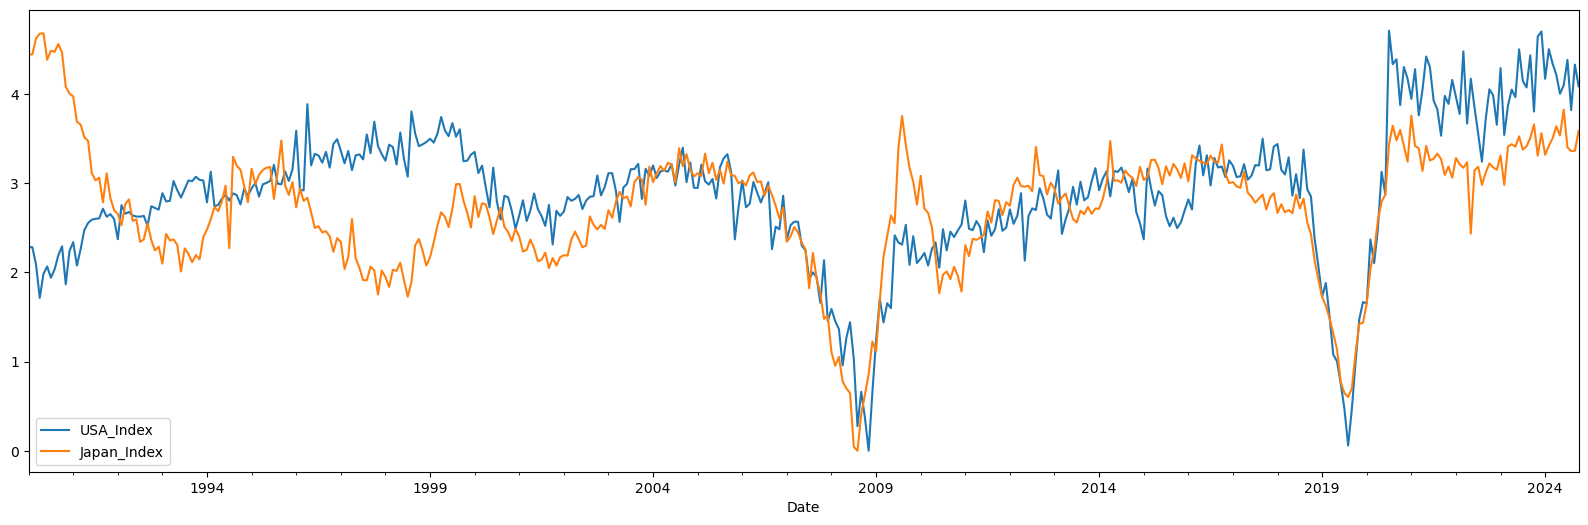

In [162]:
common_index_pca.plot(figsize=(20,6))

#   More deep Analysis.. 

In [163]:
money_politics = pd.read_csv("money_politics.csv", index_col="Date")
trading_view = pd.read_csv("trading_view.csv", index_col="Date")

In [164]:
trading_view.columns

Index(['S&P500', 'DowJones', 'MSCI_World', 'Nikkei_225', 'VIX_Index_Price',
       'Dollar_Price_in_Yen', 'JPY_Volatility_in_%', 'Bonds_10Y2Y',
       'Bonds_10Y3M'],
      dtype='object')

<Axes: xlabel='Date'>

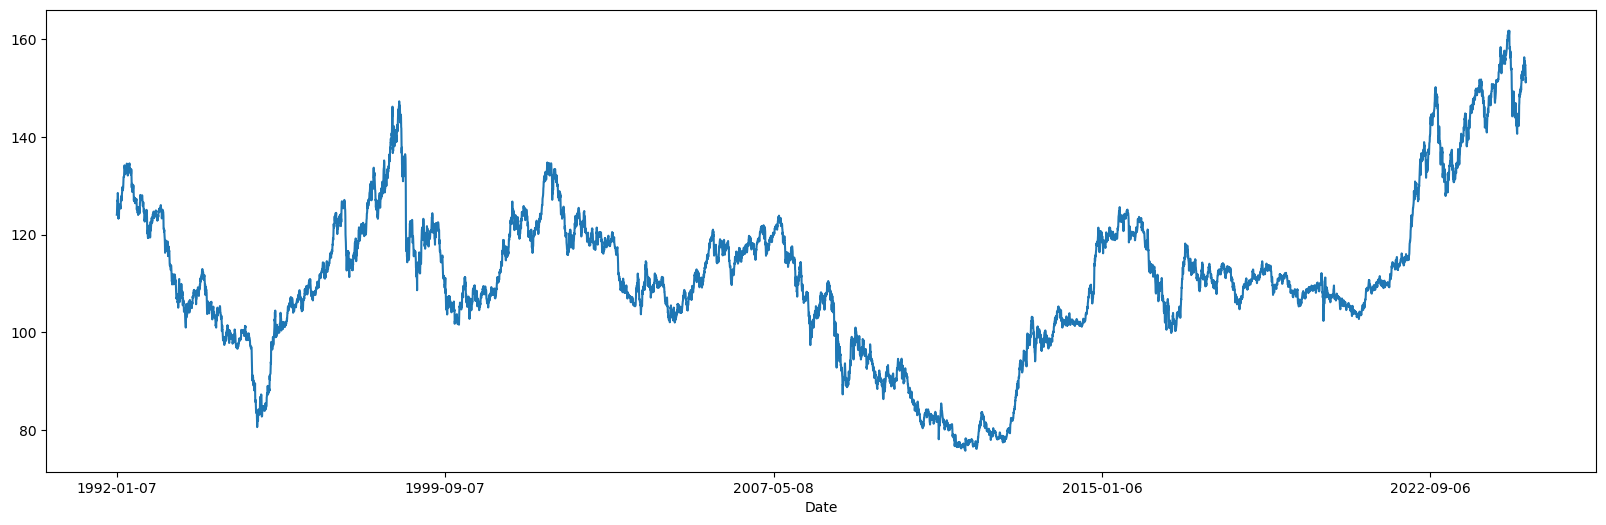

In [165]:
trading_view["Dollar_Price_in_Yen"].plot(figsize=(20,6))

#   plotting indices with yen-usd pair

<Axes: xlabel='Date'>

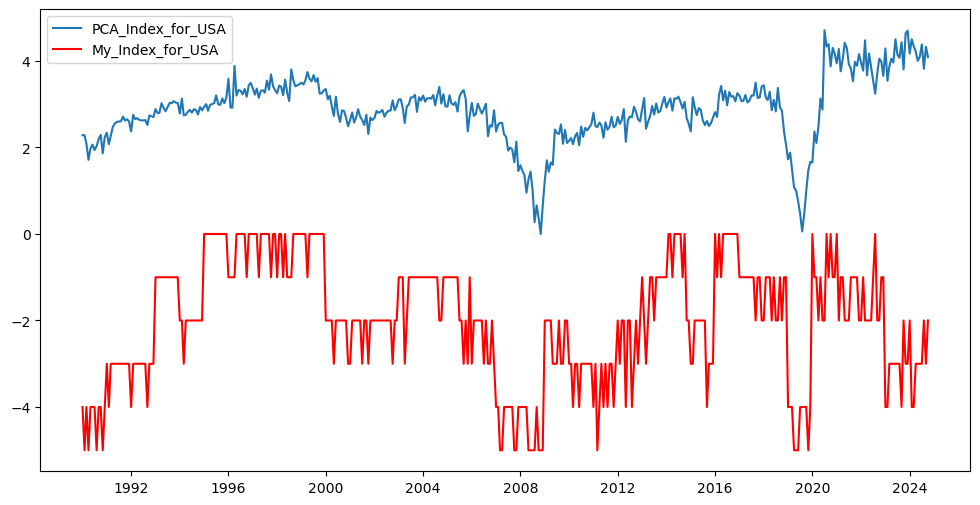

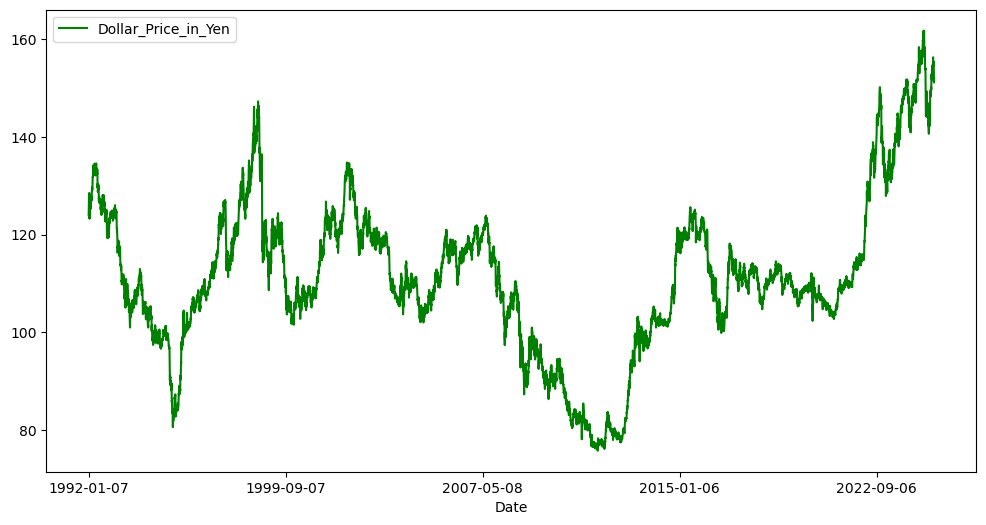

In [166]:
plt.figure(figsize=(12,6))
plt.plot(common_index_pca.USA_Index)
plt.plot(country_index_usa["Date"], country_index_usa["total"], color="red")
plt.legend(["PCA_Index_for_USA", "My_Index_for_USA"])
yen = pd.DataFrame(trading_view["Dollar_Price_in_Yen"])
yen["Date"] = trading_view.index
yen.set_index("Date", inplace=True)
yen.plot(figsize=(12,6), color="green")

#plt.plot(trading_view["Dollar_Price_in_Yen"].index.values, trading_view["Dollar_Price_in_Yen"].values)


#   Market movement correlations to Indices

In [167]:
trading_view.columns

Index(['S&P500', 'DowJones', 'MSCI_World', 'Nikkei_225', 'VIX_Index_Price',
       'Dollar_Price_in_Yen', 'JPY_Volatility_in_%', 'Bonds_10Y2Y',
       'Bonds_10Y3M'],
      dtype='object')

In [168]:
#country_index_usa
#trading_view['Bonds_10Y2Y']
#trading_view["Dollar_Price_in_Yen"]
#trading_view["S&P500"]
#trading_view["MSCI_World"]
#trading_view["VIX_Index_Price"]


In [169]:
#   concatinating index vs. bonds

In [170]:
bonds = pd.DataFrame(trading_view['Bonds_10Y2Y'], index=trading_view["Bonds_10Y2Y"].index)
bonds["Date"] = trading_view["Bonds_10Y2Y"].index
bonds["Date"] = pd.to_datetime(bonds["Date"])
bonds["Date"] = pd.to_datetime(bonds["Date"].apply(lambda x:x.strftime("%Y-%m"))).apply(lambda x:x.strftime("%Y-%m-%d"))
print(bonds.reset_index(drop=True).groupby(["Date"]).mean()[:-1])
bonds.head(12)

            Bonds_10Y2Y
Date                   
1992-01-01     2.078947
1992-02-01     2.131000
1992-03-01     1.857273
1992-04-01     2.135000
1992-05-01     2.163810
...                 ...
2024-07-01    -0.251739
2024-08-01    -0.094545
2024-09-01     0.094286
2024-10-01     0.121304
2024-11-01     0.096190

[395 rows x 1 columns]


Bonds_10Y2Y        Date
Date                               
1992-01-07         2.09  1992-01-01
1992-01-08         2.11  1992-01-01
1992-01-09         2.02  1992-01-01
1992-01-10         2.00  1992-01-01
1992-01-13         1.99  1992-01-01
1992-01-14         2.03  1992-01-01
1992-01-15         1.98  1992-01-01
1992-01-16         2.06  1992-01-01
1992-01-17         2.07  1992-01-01
1992-01-20         2.06  1992-01-01
1992-01-21         2.06  1992-01-01
1992-01-22         2.14  1992-01-01

In [171]:
country_index_usa[24:]

CPI_USA_Change  USA_WageH_Change  USA_GDP_Dollar_Change  \
Date                                                                  
1992-01-01               0                -1                   -1.0   
1992-02-01               0                 0                   -1.0   
1992-03-01               0                 0                   -1.0   
1992-04-01               0                 0                   -1.0   
1992-05-01               0                 0                   -1.0   
...                    ...               ...                    ...   
2024-06-01               0                -1                    0.0   
2024-07-01               0                -1                    0.0   
2024-08-01               0                 0                    0.0   
2024-09-01               0                -1                    0.0   
2024-10-01               0                 0                    0.0   

            USA_%_Debt_to_GDP_Change  total       Date  
Date                                                    
1992-01-01                      -2.0   -4.0 1992-01-01  
1992-02-01                      -2.0   -3.0 1992-02-01  
1992-03-01                      -2.0   -3.0 1992-03-01  
1992-04-01                      -2.0   -3.0 1992-04-01  
1992-05-01                      -2.0   -3.0 1992-05-01  
...                              ...    ...        ...  
2024-06-01                      -2.0   -3.0 2024-06-01  
2024-07-01                      -2.0   -3.0 2024-07-01  
2024-08-01                      -2.0   -2.0 2024-08-01  
2024-09-01                      -2.0   -3.0 2024-09-01  
2024-10-01                      -2.0   -2.0 2024-10-01  

[394 rows x 6 columns]

<Axes: xlabel='Date'>

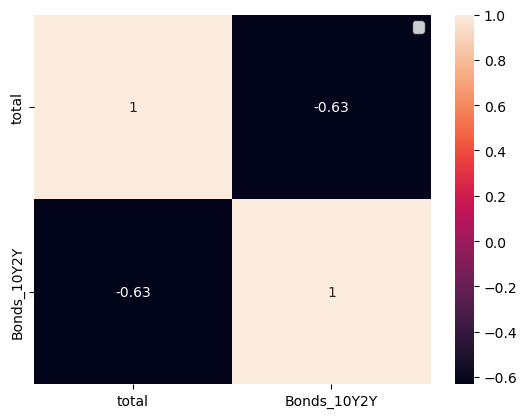

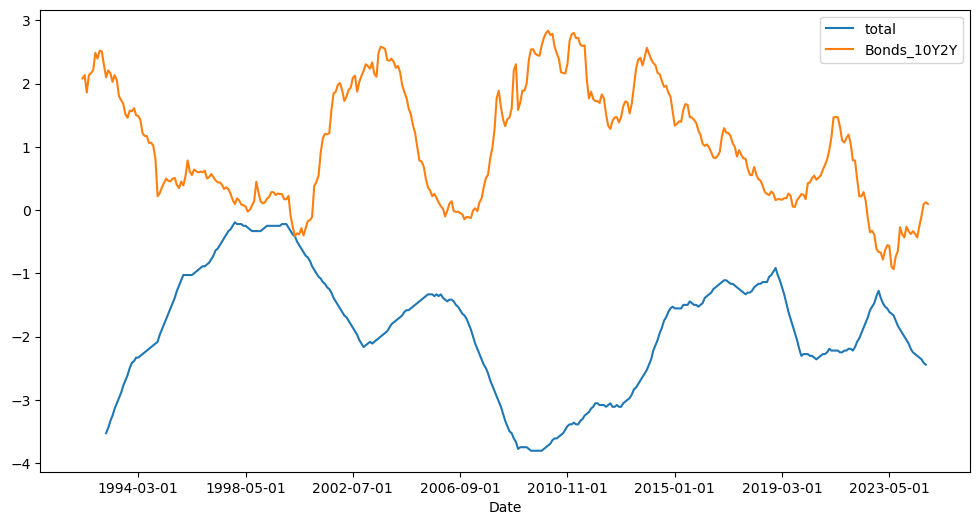

In [172]:
corr1 = pd.concat([country_index_usa["total"].rolling(window=36).mean(), bonds.reset_index(drop=True).groupby(["Date"]).mean()[:-1]], axis=1)

sns.heatmap(corr1[["total", "Bonds_10Y2Y"]].corr(),annot=True)

plt.legend(["USA_Index_SMA_3Y", "USA_Bonds_10y2y"])
corr1.plot(figsize=(12,6))

In [173]:
#   checking correlation with USA_Index and USA Market

<Axes: xlabel='Date'>

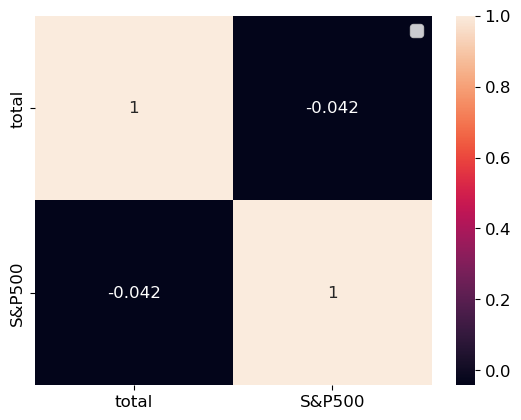

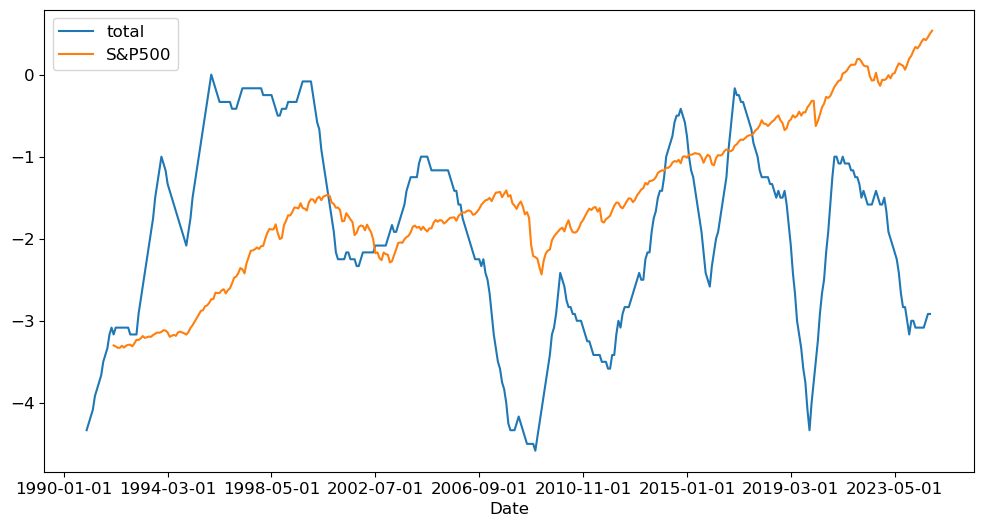

In [226]:
snp = pd.DataFrame(trading_view["S&P500"], index=trading_view["S&P500"].index)
snp["Date"] = trading_view["S&P500"].index
snp["Date"] = pd.to_datetime(snp["Date"])
snp["Date"] = pd.to_datetime(snp["Date"].apply(lambda x:x.strftime("%Y-%m"))).apply(lambda x:x.strftime("%Y-%m-%d"))

#   very important Move!!!
#   the value, if it is a stock exc. will be ALSO scaled!

#print(snp.reset_index(drop=True).groupby(["Date"]).mean()[:-1]["S&P500"].apply(lambda x:x/snp.reset_index(drop=True).groupby(["Date"]).mean()[:-1]["S&P500"].max()*4))




corr2 = pd.concat([country_index_usa["total"].rolling(window=12).mean(), snp.reset_index(drop=True).groupby(["Date"]).mean()[:-1]["S&P500"].apply(lambda x:np.log2(x)-12)], axis=1)

sns.heatmap(corr2[["total", "S&P500"]].corr("pearson"), annot=True)

plt.legend(["USA_Index_SMA_12Mo", "S&P_with_Scaled"])
corr2[["total", "S&P500"]].plot(figsize=(12,6))

In [175]:
#   stationarizing market movement:

<Axes: xlabel='Date'>

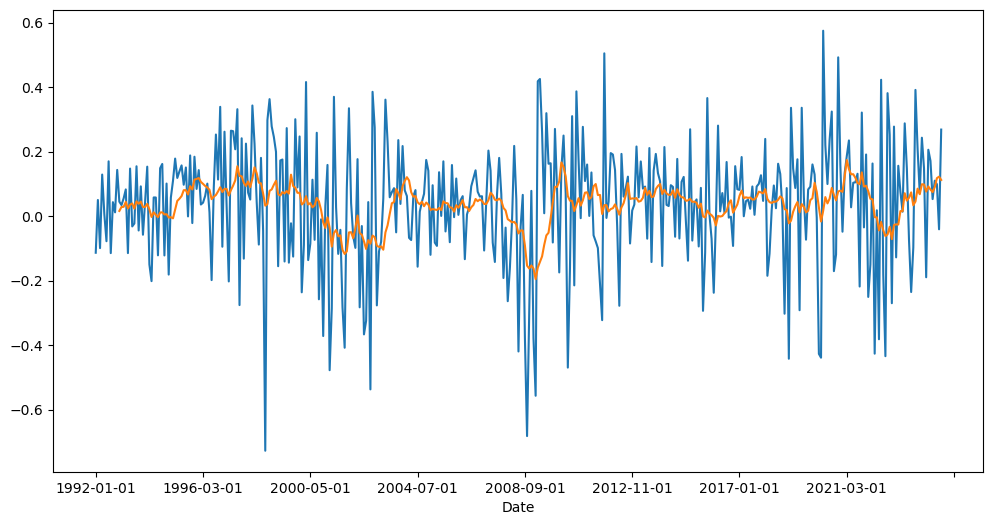

In [176]:
stat_snp = pd.DataFrame(trading_view["S&P500"].pct_change().apply(lambda x:x*100), index=trading_view["S&P500"].index)
stat_snp["Date"] = trading_view["S&P500"].index
stat_snp["Date"] = pd.to_datetime(stat_snp["Date"])
stat_snp["Date"] = pd.to_datetime(stat_snp["Date"].apply(lambda x:x.strftime("%Y-%m"))).apply(lambda x:x.strftime("%Y-%m-%d"))
stat_snp.set_index("Date")

stat_snp = stat_snp.reset_index(drop=True).groupby(["Date"]).mean()[:-1]
stat_snp["S&P500"].plot(figsize=(12,6))
stat_snp["S&P500"].rolling(window=12).mean().plot(figsize=(12,6))

<Axes: xlabel='Date'>

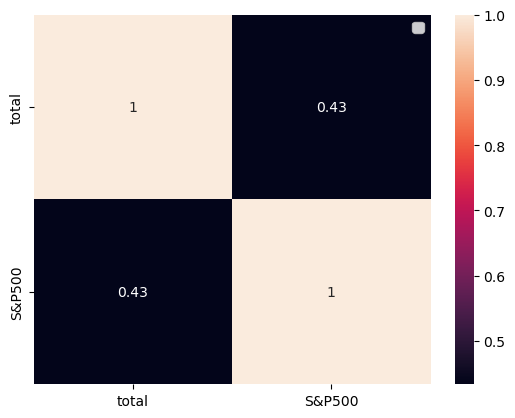

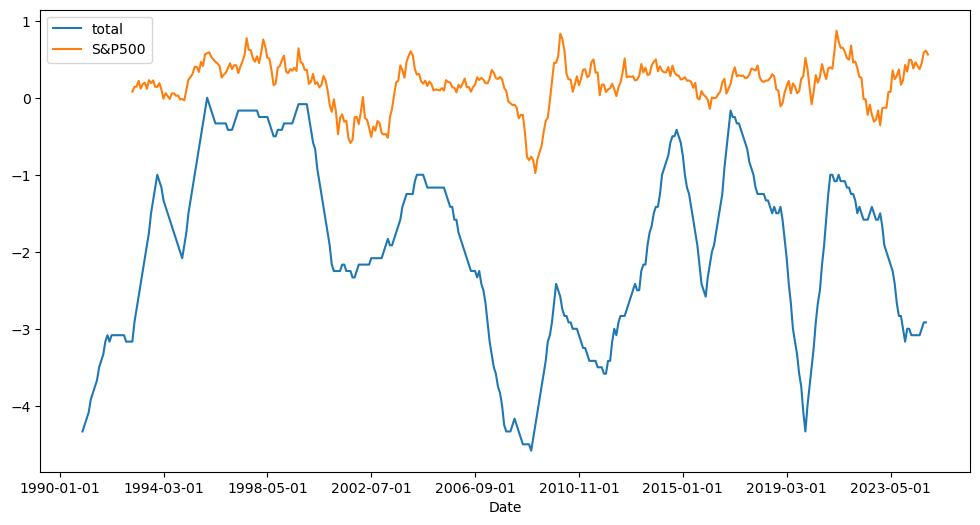

In [177]:

corr3 = pd.concat([country_index_usa["total"].rolling(window=12).mean(), stat_snp["S&P500"].apply(lambda x:x*5).rolling(window=12).mean()], axis=1)

sns.heatmap(corr3[["total", "S&P500"]].corr("spearman"), annot=True)

plt.legend(["USA_Index_SMA_12Mo", "S&P_with_Stationarity_and_Scaled"])
corr3[["total", "S&P500"]].plot(figsize=(12,6))

In [178]:
#   Index vs IRs
#   Bonds vs IRs

In [179]:
money_politics[384:].interest_rates_USA

Date
1992-01-01    4.03
1992-02-01    4.06
1992-03-01    3.98
1992-04-01    3.73
1992-05-01    3.82
              ... 
2024-07-01    5.33
2024-08-01    5.33
2024-09-01    5.13
2024-10-01    4.83
2024-11-01    4.64
Name: interest_rates_USA, Length: 395, dtype: float64

In [180]:
corr4 = pd.concat([country_index_usa["total"].rolling(window=36).mean(), money_politics[384:-1].interest_rates_USA], axis=1)[24:]

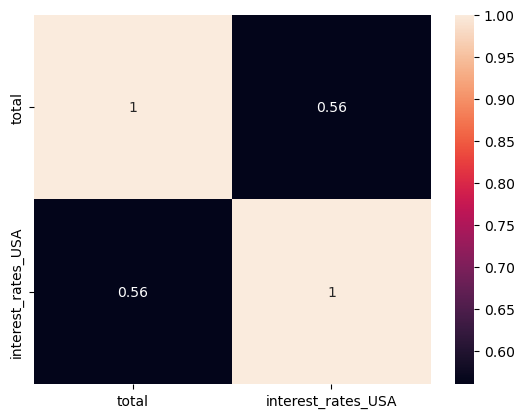

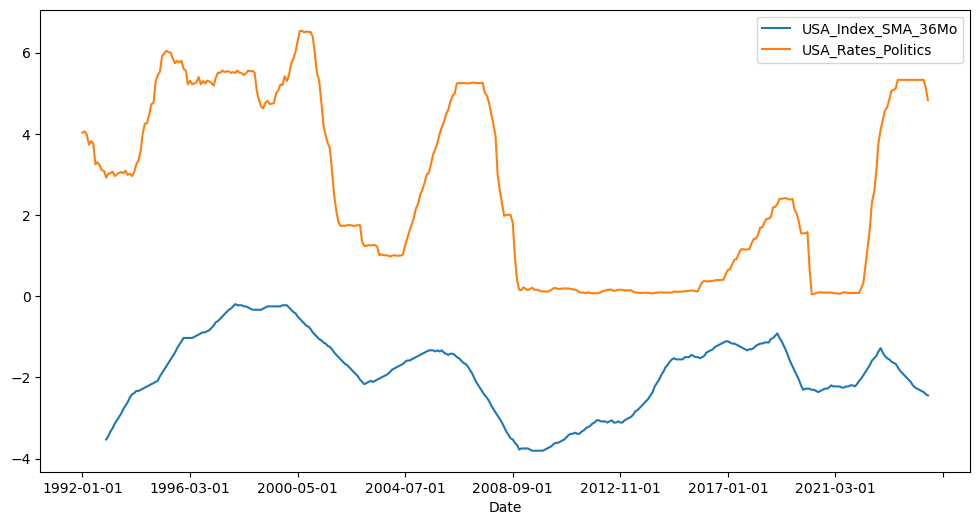

In [181]:
sns.heatmap(corr4.corr("spearman"), annot=True)

corr4.plot(figsize=(12,6))
plt.legend(["USA_Index_SMA_36Mo", "USA_Rates_Politics"])


In [182]:
#   USA_Index vs Bonds

In [183]:
money_politics[384:].interest_rates_USA

Date
1992-01-01    4.03
1992-02-01    4.06
1992-03-01    3.98
1992-04-01    3.73
1992-05-01    3.82
              ... 
2024-07-01    5.33
2024-08-01    5.33
2024-09-01    5.13
2024-10-01    4.83
2024-11-01    4.64
Name: interest_rates_USA, Length: 395, dtype: float64

In [184]:
corr5 = pd.concat([money_politics[384:].interest_rates_USA, bonds.reset_index(drop=True).groupby(["Date"]).mean()], axis=1)

In [185]:
corr5

interest_rates_USA  Bonds_10Y2Y
Date                                       
1992-01-01                4.03     2.078947
1992-02-01                4.06     2.131000
1992-03-01                3.98     1.857273
1992-04-01                3.73     2.135000
1992-05-01                3.82     2.163810
...                        ...          ...
2024-08-01                5.33    -0.094545
2024-09-01                5.13     0.094286
2024-10-01                4.83     0.121304
2024-11-01                4.64     0.096190
2024-12-01                 NaN     0.020000

[396 rows x 2 columns]

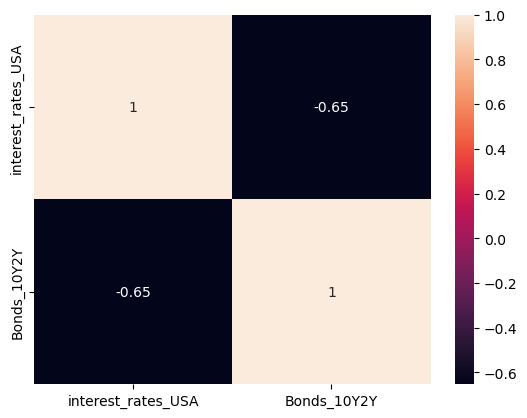

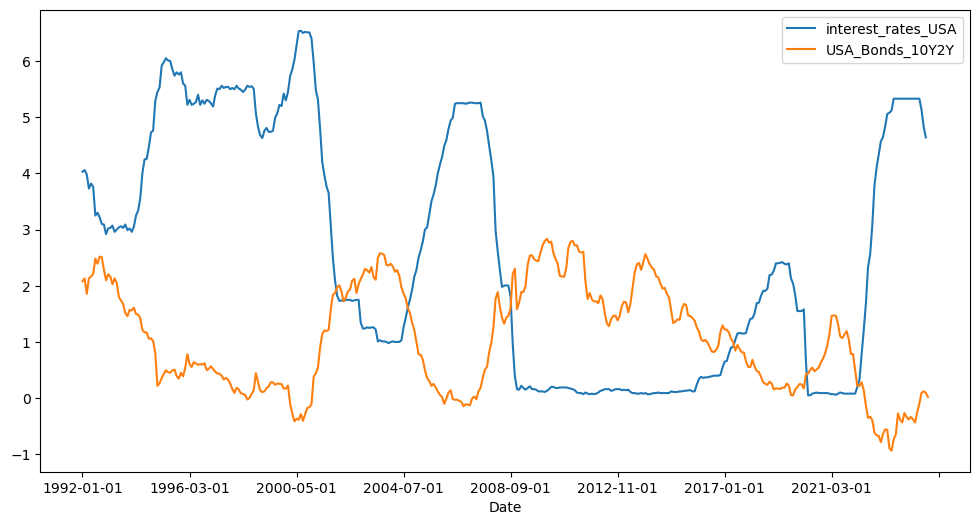

In [186]:
sns.heatmap(corr5.corr("spearman"), annot=True)

corr5.plot(figsize=(12,6))
plt.legend(["interest_rates_USA", "USA_Bonds_10Y2Y"])


In [187]:
#   correlation bonds, index, dollar-to-yen

In [188]:
yen

Dollar_Price_in_Yen
Date                           
1992-01-07               124.05
1992-01-08               124.30
1992-01-09               125.80
1992-01-10               126.93
1992-01-13               127.00
...                         ...
2024-11-26               153.10
2024-11-27               151.10
2024-11-28               151.93
2024-11-29                  NaN
2024-12-02                  NaN

[8585 rows x 1 columns]

In [189]:
#   yen i would scale to plot easier

In [190]:
yen = pd.DataFrame(trading_view['Dollar_Price_in_Yen'], index=trading_view["Dollar_Price_in_Yen"].index)
yen["Date"] = trading_view["Dollar_Price_in_Yen"].index
yen["Date"] = pd.to_datetime(yen["Date"])
yen["Date"] = pd.to_datetime(yen["Date"].apply(lambda x:x.strftime("%Y-%m"))).apply(lambda x:x.strftime("%Y-%m-%d"))
print(yen.reset_index(drop=True).groupby(["Date"]).mean())
yen["Dollar_Price_in_Yen"] = yen["Dollar_Price_in_Yen"].apply(lambda x: x/20)
yen.head(5)



            Dollar_Price_in_Yen
Date                           
1992-01-01           125.325789
1992-02-01           127.632000
1992-03-01           132.755909
1992-04-01           133.511818
1992-05-01           130.603333
...                         ...
2024-08-01           146.136818
2024-09-01           143.159048
2024-10-01           149.917826
2024-11-01           153.778500
2024-12-01                  NaN

[396 rows x 1 columns]


Dollar_Price_in_Yen        Date
Date                                       
1992-01-07               6.2025  1992-01-01
1992-01-08               6.2150  1992-01-01
1992-01-09               6.2900  1992-01-01
1992-01-10               6.3465  1992-01-01
1992-01-13               6.3500  1992-01-01

In [191]:
corr6 = pd.concat([money_politics[384:].interest_rates_USA, bonds.reset_index(drop=True).groupby(["Date"]).mean(), yen.reset_index(drop=True).groupby(["Date"]).mean()], axis=1)

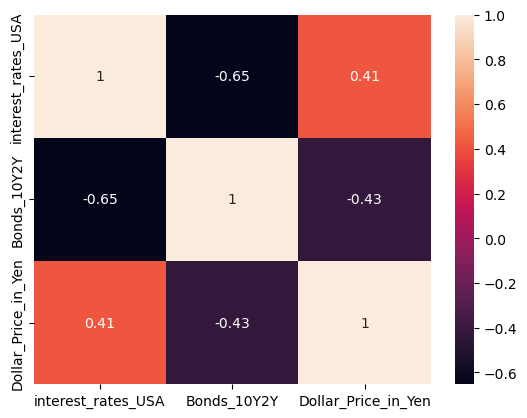

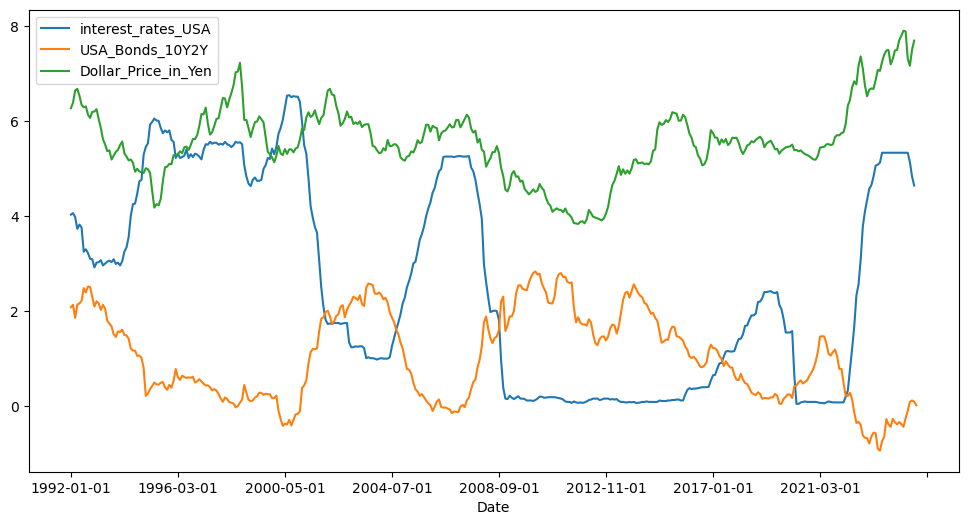

In [192]:
sns.heatmap(corr6.corr("spearman"), annot=True)

corr6.plot(figsize=(12,6))
plt.legend(["interest_rates_USA", "USA_Bonds_10Y2Y", "Dollar_Price_in_Yen"])


In [193]:
#   correlation USA index vs msci_world

<Axes: xlabel='Date'>

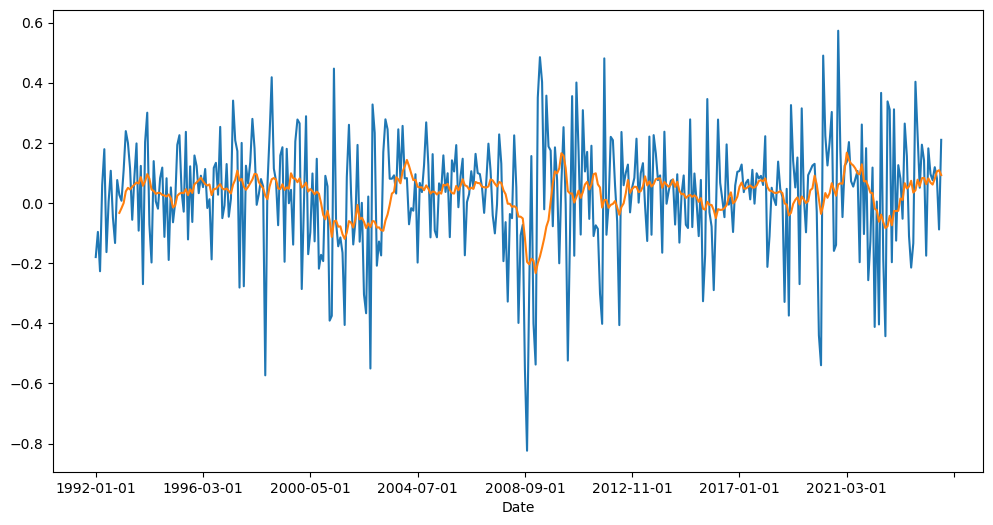

In [194]:
stat_msci = pd.DataFrame(trading_view["MSCI_World"].pct_change().apply(lambda x:x*100), index=trading_view["MSCI_World"].index)
stat_msci["Date"] = trading_view["MSCI_World"].index
stat_msci["Date"] = pd.to_datetime(stat_msci["Date"])
stat_msci["Date"] = pd.to_datetime(stat_msci["Date"].apply(lambda x:x.strftime("%Y-%m"))).apply(lambda x:x.strftime("%Y-%m-%d"))
stat_msci.set_index("Date")

stat_msci = stat_msci.reset_index(drop=True).groupby(["Date"]).mean()[:-1]
stat_msci["MSCI_World"].plot(figsize=(12,6))
stat_msci["MSCI_World"].rolling(window=12).mean().plot(figsize=(12,6))

<Axes: xlabel='Date'>

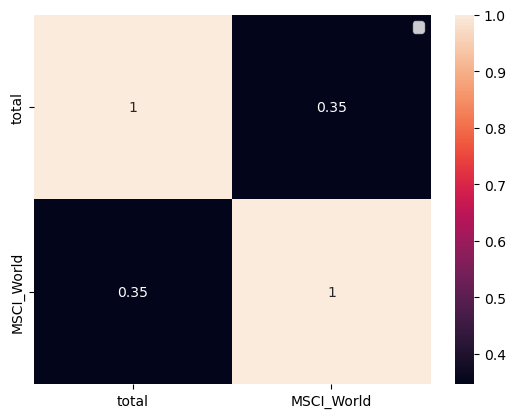

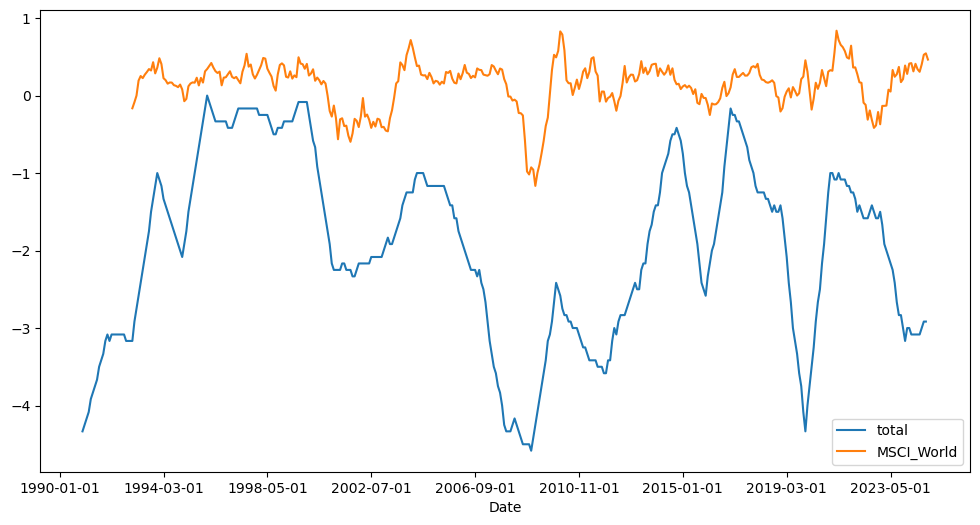

In [195]:
corr7 = pd.concat([country_index_usa["total"].rolling(window=12).mean(), stat_msci["MSCI_World"].apply(lambda x:x*5).rolling(window=12).mean()], axis=1)

sns.heatmap(corr7[["total", "MSCI_World"]].corr("spearman"), annot=True)

plt.legend(["USA_Index_SMA_12Mo", "MSCI_World_with_Stationarity_and_Scaled"])
corr7[["total", "MSCI_World"]].plot(figsize=(12,6))

In [196]:
#   The Big ML Table. connecting the dots

#   Here an Idea: 
#       instead of volatile Market, introduce SMAs
#       reverse: Introduce Volatility-Index, because Volatility= Problems
#       with elipsoid function convert (all) values into -1 / 1: andventages: instead of predicting the price, the movement could be predicted; correlation could be increased

In [197]:
#   USA_Index, USA_Index_SMA(36), USA_Index_SMA(12), Bonds_10Y2Y, IR, S&P500_scaled_stat_mean, MSCI_World_scaled_stat_mean, USD_to_JPY_scaled_mean, VIX-Index_scaled, JPY_Volatility, Market_Volatility

In [198]:
USA_Index = pd.DataFrame(country_index_usa["total"], index=country_index_usa["total"].index)
USA_Index.rename(columns={"total": "USA_Index_Total"}, inplace=True)
full_df = pd.concat([USA_Index, country_index_usa["total"].rolling(window=36).mean()], axis=1)
full_df.rename(columns={"total": "USA_Index_SMA(36)"}, inplace=True)
full_df = pd.concat([full_df, country_index_usa["total"].rolling(window=12).mean()], axis=1)
full_df.rename(columns={"total": "USA_Index_SMA(12)"}, inplace=True)
full_df = pd.concat([full_df, bonds.reset_index(drop=True).groupby(["Date"]).mean()[:-1]], axis=1)
full_df.rename(columns={"Bonds_10Y2Y": "USA_Bonds_10Y2Y"}, inplace=True)
full_df = pd.concat([full_df, money_politics[384:].interest_rates_USA[:-1]], axis=1)
full_df = pd.concat([full_df, stat_snp["S&P500"].apply(lambda x:x*5).rolling(window=12).mean()], axis=1)
full_df.rename(columns={"S&P500": "S&P500_change_stat_mean"}, inplace=True)
full_df = pd.concat([full_df, stat_msci["MSCI_World"].apply(lambda x:x*5).rolling(window=12).mean()], axis=1)
full_df.rename(columns={"MSCI_World": "MSCI_World_change_stat_mean"}, inplace=True)
full_df = pd.concat([full_df, yen.reset_index(drop=True).groupby(["Date"]).mean()[:-1]], axis=1)
full_df.rename(columns={"Dollar_Price_in_Yen": "Dollar_Price_in_Yen_scaled_mean"}, inplace=True)


full_df

USA_Index_Total  USA_Index_SMA(36)  USA_Index_SMA(12)  \
Date                                                                
1990-01-01             -4.0                NaN                NaN   
1990-02-01             -5.0                NaN                NaN   
1990-03-01             -4.0                NaN                NaN   
1990-04-01             -5.0                NaN                NaN   
1990-05-01             -4.0                NaN                NaN   
...                     ...                ...                ...   
2024-07-01             -3.0          -2.333333          -3.083333   
2024-08-01             -2.0          -2.361111          -3.000000   
2024-09-01             -3.0          -2.416667          -2.916667   
2024-10-01             -2.0          -2.444444          -2.916667   
2024-11-01              NaN                NaN                NaN   

            USA_Bonds_10Y2Y  interest_rates_USA  S&P500_change_stat_mean  \
Date                                                                       
1990-01-01              NaN                 NaN                      NaN   
1990-02-01              NaN                 NaN                      NaN   
1990-03-01              NaN                 NaN                      NaN   
1990-04-01              NaN                 NaN                      NaN   
1990-05-01              NaN                 NaN                      NaN   
...                     ...                 ...                      ...   
2024-07-01        -0.251739                5.33                 0.372143   
2024-08-01        -0.094545                5.33                 0.449098   
2024-09-01         0.094286                5.13                 0.588308   
2024-10-01         0.121304                4.83                 0.611756   
2024-11-01         0.096190                 NaN                 0.560507   

            MSCI_World_change_stat_mean  Dollar_Price_in_Yen_scaled_mean  
Date                                                                      
1990-01-01                          NaN                              NaN  
1990-02-01                          NaN                              NaN  
1990-03-01                          NaN                              NaN  
1990-04-01                          NaN                              NaN  
1990-05-01                          NaN                              NaN  
...                                 ...                              ...  
2024-07-01                     0.306553                         7.880957  
2024-08-01                     0.402071                         7.306841  
2024-09-01                     0.525918                         7.157952  
2024-10-01                     0.544906                         7.495891  
2024-11-01                     0.464422                         7.688925  

[419 rows x 8 columns]

In [199]:
country_index_japan["total"]

Date
1990-01-01    0.0
1990-02-01   -1.0
1990-03-01   -1.0
1990-04-01   -1.0
1990-05-01   -1.0
             ... 
2024-06-01   -2.0
2024-07-01   -3.0
2024-08-01   -3.0
2024-09-01   -1.0
2024-10-01   -2.0
Name: total, Length: 418, dtype: float64

In [200]:
#   joining Japan

In [201]:
full_df

USA_Index_Total  USA_Index_SMA(36)  USA_Index_SMA(12)  \
Date                                                                
1990-01-01             -4.0                NaN                NaN   
1990-02-01             -5.0                NaN                NaN   
1990-03-01             -4.0                NaN                NaN   
1990-04-01             -5.0                NaN                NaN   
1990-05-01             -4.0                NaN                NaN   
...                     ...                ...                ...   
2024-07-01             -3.0          -2.333333          -3.083333   
2024-08-01             -2.0          -2.361111          -3.000000   
2024-09-01             -3.0          -2.416667          -2.916667   
2024-10-01             -2.0          -2.444444          -2.916667   
2024-11-01              NaN                NaN                NaN   

            USA_Bonds_10Y2Y  interest_rates_USA  S&P500_change_stat_mean  \
Date                                                                       
1990-01-01              NaN                 NaN                      NaN   
1990-02-01              NaN                 NaN                      NaN   
1990-03-01              NaN                 NaN                      NaN   
1990-04-01              NaN                 NaN                      NaN   
1990-05-01              NaN                 NaN                      NaN   
...                     ...                 ...                      ...   
2024-07-01        -0.251739                5.33                 0.372143   
2024-08-01        -0.094545                5.33                 0.449098   
2024-09-01         0.094286                5.13                 0.588308   
2024-10-01         0.121304                4.83                 0.611756   
2024-11-01         0.096190                 NaN                 0.560507   

            MSCI_World_change_stat_mean  Dollar_Price_in_Yen_scaled_mean  
Date                                                                      
1990-01-01                          NaN                              NaN  
1990-02-01                          NaN                              NaN  
1990-03-01                          NaN                              NaN  
1990-04-01                          NaN                              NaN  
1990-05-01                          NaN                              NaN  
...                                 ...                              ...  
2024-07-01                     0.306553                         7.880957  
2024-08-01                     0.402071                         7.306841  
2024-09-01                     0.525918                         7.157952  
2024-10-01                     0.544906                         7.495891  
2024-11-01                     0.464422                         7.688925  

[419 rows x 8 columns]

In [202]:
trading_view.head()

S&P500     DowJones  MSCI_World    Nikkei_225  \
Date                                                            
1992-01-07  417.399994  3204.800049  542.099976  23566.390625   
1992-01-08  418.100006  3203.899902  535.299988  22715.000000   
1992-01-09  417.609985  3209.500000  536.400024  23113.640625   
1992-01-10  415.100006  3199.500000  524.500000  22381.900391   
1992-01-13  414.339996  3185.600098  520.099976  21696.859375   

            VIX_Index_Price  Dollar_Price_in_Yen  JPY_Volatility_in_%  \
Date                                                                    
1992-01-07        20.299999               124.05                 0.57   
1992-01-08        17.530001               124.30                 0.20   
1992-01-09        17.580000               125.80                 1.21   
1992-01-10        18.500000               126.93                 0.90   
1992-01-13        19.049999               127.00                 0.06   

            Bonds_10Y2Y  Bonds_10Y3M  
Date                                  
1992-01-07         2.09         2.91  
1992-01-08         2.11         2.95  
1992-01-09         2.02         2.92  
1992-01-10         2.00         2.93  
1992-01-13         1.99         3.00

In [203]:
VIX = pd.DataFrame(trading_view['VIX_Index_Price'], index=trading_view["VIX_Index_Price"].index)
VIX["Date"] = trading_view["VIX_Index_Price"].index
VIX["Date"] = pd.to_datetime(VIX["Date"])
VIX["Date"] = pd.to_datetime(VIX["Date"].apply(lambda x:x.strftime("%Y-%m"))).apply(lambda x:x.strftime("%Y-%m-%d"))
VIX = VIX.set_index("Date")
print(VIX.groupby(["Date"]).mean())
VIX["VIX_Index_Price"] = VIX["VIX_Index_Price"].apply(lambda x: x/VIX["VIX_Index_Price"].max())
VIX.head(5)

            VIX_Index_Price
Date                       
1992-01-01        17.205263
1992-02-01        17.228000
1992-03-01        17.716364
1992-04-01        16.769091
1992-05-01        14.761429
...                     ...
2024-08-01        19.190909
2024-09-01        17.821905
2024-10-01        19.902174
2024-11-01        16.377619
2024-12-01        14.080000

[396 rows x 1 columns]


VIX_Index_Price
Date                       
1992-01-01         0.245495
1992-01-01         0.211997
1992-01-01         0.212601
1992-01-01         0.223727
1992-01-01         0.230379

In [204]:
full_df = pd.concat([full_df, VIX.groupby(["Date"]).mean()[:-1]], axis=1)
full_df.rename(columns={"VIX_Index_Price": "VIX_Index_Price_Scaled"}, inplace=True)


full_df



USA_Index_Total  USA_Index_SMA(36)  USA_Index_SMA(12)  \
Date                                                                
1990-01-01             -4.0                NaN                NaN   
1990-02-01             -5.0                NaN                NaN   
1990-03-01             -4.0                NaN                NaN   
1990-04-01             -5.0                NaN                NaN   
1990-05-01             -4.0                NaN                NaN   
...                     ...                ...                ...   
2024-07-01             -3.0          -2.333333          -3.083333   
2024-08-01             -2.0          -2.361111          -3.000000   
2024-09-01             -3.0          -2.416667          -2.916667   
2024-10-01             -2.0          -2.444444          -2.916667   
2024-11-01              NaN                NaN                NaN   

            USA_Bonds_10Y2Y  interest_rates_USA  S&P500_change_stat_mean  \
Date                                                                       
1990-01-01              NaN                 NaN                      NaN   
1990-02-01              NaN                 NaN                      NaN   
1990-03-01              NaN                 NaN                      NaN   
1990-04-01              NaN                 NaN                      NaN   
1990-05-01              NaN                 NaN                      NaN   
...                     ...                 ...                      ...   
2024-07-01        -0.251739                5.33                 0.372143   
2024-08-01        -0.094545                5.33                 0.449098   
2024-09-01         0.094286                5.13                 0.588308   
2024-10-01         0.121304                4.83                 0.611756   
2024-11-01         0.096190                 NaN                 0.560507   

            MSCI_World_change_stat_mean  Dollar_Price_in_Yen_scaled_mean  \
Date                                                                       
1990-01-01                          NaN                              NaN   
1990-02-01                          NaN                              NaN   
1990-03-01                          NaN                              NaN   
1990-04-01                          NaN                              NaN   
1990-05-01                          NaN                              NaN   
...                                 ...                              ...   
2024-07-01                     0.306553                         7.880957   
2024-08-01                     0.402071                         7.306841   
2024-09-01                     0.525918                         7.157952   
2024-10-01                     0.544906                         7.495891   
2024-11-01                     0.464422                         7.688925   

            VIX_Index_Price_Scaled  
Date                                
1990-01-01                     NaN  
1990-02-01                     NaN  
1990-03-01                     NaN  
1990-04-01                     NaN  
1990-05-01                     NaN  
...                            ...  
2024-07-01                0.173524  
2024-08-01                0.232083  
2024-09-01                0.215527  
2024-10-01                0.240684  
2024-11-01                0.198060  

[419 rows x 9 columns]

In [205]:
USA_Index_PCA = pd.DataFrame(common_index_pca["USA_Index"], index=common_index_pca["USA_Index"].index)
USA_Index_PCA["Date"] = USA_Index_PCA["USA_Index"].index
USA_Index_PCA["Date"] = pd.to_datetime(USA_Index_PCA["Date"])
USA_Index_PCA["Date"] = USA_Index_PCA["Date"].apply(lambda x:x.strftime("%Y-%m-%d"))
USA_Index_PCA = USA_Index_PCA.set_index("Date")

In [206]:
#   diese Sache zu verstehen (dass ich den Datentyp von Date in Index noch wechseln muss, sonst lassen sich DF's nicht verbinden..) hat nur stunden gedauert....

In [207]:
full_df.index.dtype

USA_Index_PCA.index.dtype

dtype('O')

In [208]:
full_df = pd.concat([full_df, USA_Index_PCA], axis=1)
full_df.rename(columns={"USA_Index": "USA_Index_PCA"}, inplace=True)


full_df


USA_Index_Total  USA_Index_SMA(36)  USA_Index_SMA(12)  \
Date                                                                
1990-01-01             -4.0                NaN                NaN   
1990-02-01             -5.0                NaN                NaN   
1990-03-01             -4.0                NaN                NaN   
1990-04-01             -5.0                NaN                NaN   
1990-05-01             -4.0                NaN                NaN   
...                     ...                ...                ...   
2024-07-01             -3.0          -2.333333          -3.083333   
2024-08-01             -2.0          -2.361111          -3.000000   
2024-09-01             -3.0          -2.416667          -2.916667   
2024-10-01             -2.0          -2.444444          -2.916667   
2024-11-01              NaN                NaN                NaN   

            USA_Bonds_10Y2Y  interest_rates_USA  S&P500_change_stat_mean  \
Date                                                                       
1990-01-01              NaN                 NaN                      NaN   
1990-02-01              NaN                 NaN                      NaN   
1990-03-01              NaN                 NaN                      NaN   
1990-04-01              NaN                 NaN                      NaN   
1990-05-01              NaN                 NaN                      NaN   
...                     ...                 ...                      ...   
2024-07-01        -0.251739                5.33                 0.372143   
2024-08-01        -0.094545                5.33                 0.449098   
2024-09-01         0.094286                5.13                 0.588308   
2024-10-01         0.121304                4.83                 0.611756   
2024-11-01         0.096190                 NaN                 0.560507   

            MSCI_World_change_stat_mean  Dollar_Price_in_Yen_scaled_mean  \
Date                                                                       
1990-01-01                          NaN                              NaN   
1990-02-01                          NaN                              NaN   
1990-03-01                          NaN                              NaN   
1990-04-01                          NaN                              NaN   
1990-05-01                          NaN                              NaN   
...                                 ...                              ...   
2024-07-01                     0.306553                         7.880957   
2024-08-01                     0.402071                         7.306841   
2024-09-01                     0.525918                         7.157952   
2024-10-01                     0.544906                         7.495891   
2024-11-01                     0.464422                         7.688925   

            VIX_Index_Price_Scaled  USA_Index_PCA  
Date                                               
1990-01-01                     NaN       2.282244  
1990-02-01                     NaN       2.282244  
1990-03-01                     NaN       2.087353  
1990-04-01                     NaN       1.714244  
1990-05-01                     NaN       1.982808  
...                            ...            ...  
2024-07-01                0.173524       4.381798  
2024-08-01                0.232083       3.818955  
2024-09-01                0.215527       4.329018  
2024-10-01                0.240684       4.087321  
2024-11-01                0.198060            NaN  

[419 rows x 10 columns]

In [209]:
full_df = pd.concat([full_df, country_index_japan["total"]], axis=1)
full_df.rename(columns={"total": "Japan_Index_Total"}, inplace=True)
full_df = pd.concat([full_df, country_index_japan["total"].rolling(window=36).mean()], axis=1)
full_df.rename(columns={"total": "Japan_Index_SMA(36)"}, inplace=True)
full_df = pd.concat([full_df, country_index_japan["total"].rolling(window=12).mean()], axis=1)
full_df.rename(columns={"total": "Japan_Index_SMA(12)"}, inplace=True)

In [210]:
full_df

USA_Index_Total  USA_Index_SMA(36)  USA_Index_SMA(12)  \
Date                                                                
1990-01-01             -4.0                NaN                NaN   
1990-02-01             -5.0                NaN                NaN   
1990-03-01             -4.0                NaN                NaN   
1990-04-01             -5.0                NaN                NaN   
1990-05-01             -4.0                NaN                NaN   
...                     ...                ...                ...   
2024-07-01             -3.0          -2.333333          -3.083333   
2024-08-01             -2.0          -2.361111          -3.000000   
2024-09-01             -3.0          -2.416667          -2.916667   
2024-10-01             -2.0          -2.444444          -2.916667   
2024-11-01              NaN                NaN                NaN   

            USA_Bonds_10Y2Y  interest_rates_USA  S&P500_change_stat_mean  \
Date                                                                       
1990-01-01              NaN                 NaN                      NaN   
1990-02-01              NaN                 NaN                      NaN   
1990-03-01              NaN                 NaN                      NaN   
1990-04-01              NaN                 NaN                      NaN   
1990-05-01              NaN                 NaN                      NaN   
...                     ...                 ...                      ...   
2024-07-01        -0.251739                5.33                 0.372143   
2024-08-01        -0.094545                5.33                 0.449098   
2024-09-01         0.094286                5.13                 0.588308   
2024-10-01         0.121304                4.83                 0.611756   
2024-11-01         0.096190                 NaN                 0.560507   

            MSCI_World_change_stat_mean  Dollar_Price_in_Yen_scaled_mean  \
Date                                                                       
1990-01-01                          NaN                              NaN   
1990-02-01                          NaN                              NaN   
1990-03-01                          NaN                              NaN   
1990-04-01                          NaN                              NaN   
1990-05-01                          NaN                              NaN   
...                                 ...                              ...   
2024-07-01                     0.306553                         7.880957   
2024-08-01                     0.402071                         7.306841   
2024-09-01                     0.525918                         7.157952   
2024-10-01                     0.544906                         7.495891   
2024-11-01                     0.464422                         7.688925   

            VIX_Index_Price_Scaled  USA_Index_PCA  Japan_Index_Total  \
Date                                                                   
1990-01-01                     NaN       2.282244                0.0   
1990-02-01                     NaN       2.282244               -1.0   
1990-03-01                     NaN       2.087353               -1.0   
1990-04-01                     NaN       1.714244               -1.0   
1990-05-01                     NaN       1.982808               -1.0   
...                            ...            ...                ...   
2024-07-01                0.173524       4.381798               -3.0   
2024-08-01                0.232083       3.818955               -3.0   
2024-09-01                0.215527       4.329018               -1.0   
2024-10-01                0.240684       4.087321               -2.0   
2024-11-01                0.198060            NaN                NaN   

            Japan_Index_SMA(36)  Japan_Index_SMA(12)  
Date                                                  
1990-01-01                  NaN                  NaN  
1990-02-01                  NaN   

<Axes: xlabel='Date'>

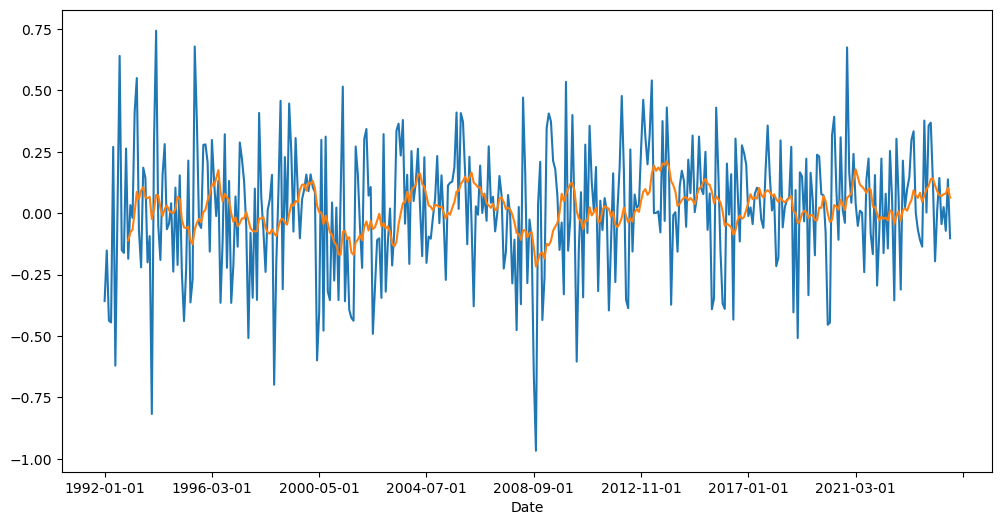

In [211]:

stat_nikkei_225 = pd.DataFrame(trading_view["Nikkei_225"].pct_change().apply(lambda x:x*100), index=trading_view["Nikkei_225"].index)
stat_nikkei_225["Date"] = trading_view["Nikkei_225"].index
stat_nikkei_225["Date"] = pd.to_datetime(stat_nikkei_225["Date"])
stat_nikkei_225["Date"] = pd.to_datetime(stat_nikkei_225["Date"].apply(lambda x:x.strftime("%Y-%m"))).apply(lambda x:x.strftime("%Y-%m-%d"))
stat_nikkei_225.set_index("Date")

stat_nikkei_225 = stat_nikkei_225.reset_index(drop=True).groupby(["Date"]).mean()[:-1]
stat_nikkei_225["Nikkei_225"].plot(figsize=(12,6))
stat_nikkei_225["Nikkei_225"].rolling(window=12).mean().plot(figsize=(12,6))


In [212]:
full_df = pd.concat([full_df, stat_nikkei_225["Nikkei_225"].apply(lambda x:x*5).rolling(window=12).mean()], axis=1)
full_df.rename(columns={"Nikkei_225": "Nikkei_225_change_stat_mean"}, inplace=True)

#   joining japan PCA_Index

Japan_Index_PCA = pd.DataFrame(common_index_pca["Japan_Index"], index=common_index_pca["Japan_Index"].index)
Japan_Index_PCA["Date"] = Japan_Index_PCA["Japan_Index"].index
Japan_Index_PCA["Date"] = pd.to_datetime(Japan_Index_PCA["Date"])
Japan_Index_PCA["Date"] = Japan_Index_PCA["Date"].apply(lambda x:x.strftime("%Y-%m-%d"))
Japan_Index_PCA = Japan_Index_PCA.set_index("Date")

full_df = pd.concat([full_df, Japan_Index_PCA], axis=1)
full_df.rename(columns={"Japan_Index": "Japan_Index_PCA"}, inplace=True)


full_df


USA_Index_Total  USA_Index_SMA(36)  USA_Index_SMA(12)  \
Date                                                                
1990-01-01             -4.0                NaN                NaN   
1990-02-01             -5.0                NaN                NaN   
1990-03-01             -4.0                NaN                NaN   
1990-04-01             -5.0                NaN                NaN   
1990-05-01             -4.0                NaN                NaN   
...                     ...                ...                ...   
2024-07-01             -3.0          -2.333333          -3.083333   
2024-08-01             -2.0          -2.361111          -3.000000   
2024-09-01             -3.0          -2.416667          -2.916667   
2024-10-01             -2.0          -2.444444          -2.916667   
2024-11-01              NaN                NaN                NaN   

            USA_Bonds_10Y2Y  interest_rates_USA  S&P500_change_stat_mean  \
Date                                                                       
1990-01-01              NaN                 NaN                      NaN   
1990-02-01              NaN                 NaN                      NaN   
1990-03-01              NaN                 NaN                      NaN   
1990-04-01              NaN                 NaN                      NaN   
1990-05-01              NaN                 NaN                      NaN   
...                     ...                 ...                      ...   
2024-07-01        -0.251739                5.33                 0.372143   
2024-08-01        -0.094545                5.33                 0.449098   
2024-09-01         0.094286                5.13                 0.588308   
2024-10-01         0.121304                4.83                 0.611756   
2024-11-01         0.096190                 NaN                 0.560507   

            MSCI_World_change_stat_mean  Dollar_Price_in_Yen_scaled_mean  \
Date                                                                       
1990-01-01                          NaN                              NaN   
1990-02-01                          NaN                              NaN   
1990-03-01                          NaN                              NaN   
1990-04-01                          NaN                              NaN   
1990-05-01                          NaN                              NaN   
...                                 ...                              ...   
2024-07-01                     0.306553                         7.880957   
2024-08-01                     0.402071                         7.306841   
2024-09-01                     0.525918                         7.157952   
2024-10-01                     0.544906                         7.495891   
2024-11-01                     0.464422                         7.688925   

            VIX_Index_Price_Scaled  USA_Index_PCA  Japan_Index_Total  \
Date                                                                   
1990-01-01                     NaN       2.282244                0.0   
1990-02-01                     NaN       2.282244               -1.0   
1990-03-01                     NaN       2.087353               -1.0   
1990-04-01                     NaN       1.714244               -1.0   
1990-05-01                     NaN       1.982808               -1.0   
...                            ...            ...                ...   
2024-07-01                0.173524       4.381798               -3.0   
2024-08-01                0.232083       3.818955               -3.0   
2024-09-01                0.215527       4.329018               -1.0   
2024-10-01                0.240684       4.087321               -2.0   
2024-11-01                0.198060            NaN                NaN   

            Japan_Index_SMA(36)  Japan_Index_SMA(12)  \
Date                                                   
1990-01-01                  NaN                  NaN   
1990-02-01                  NaN

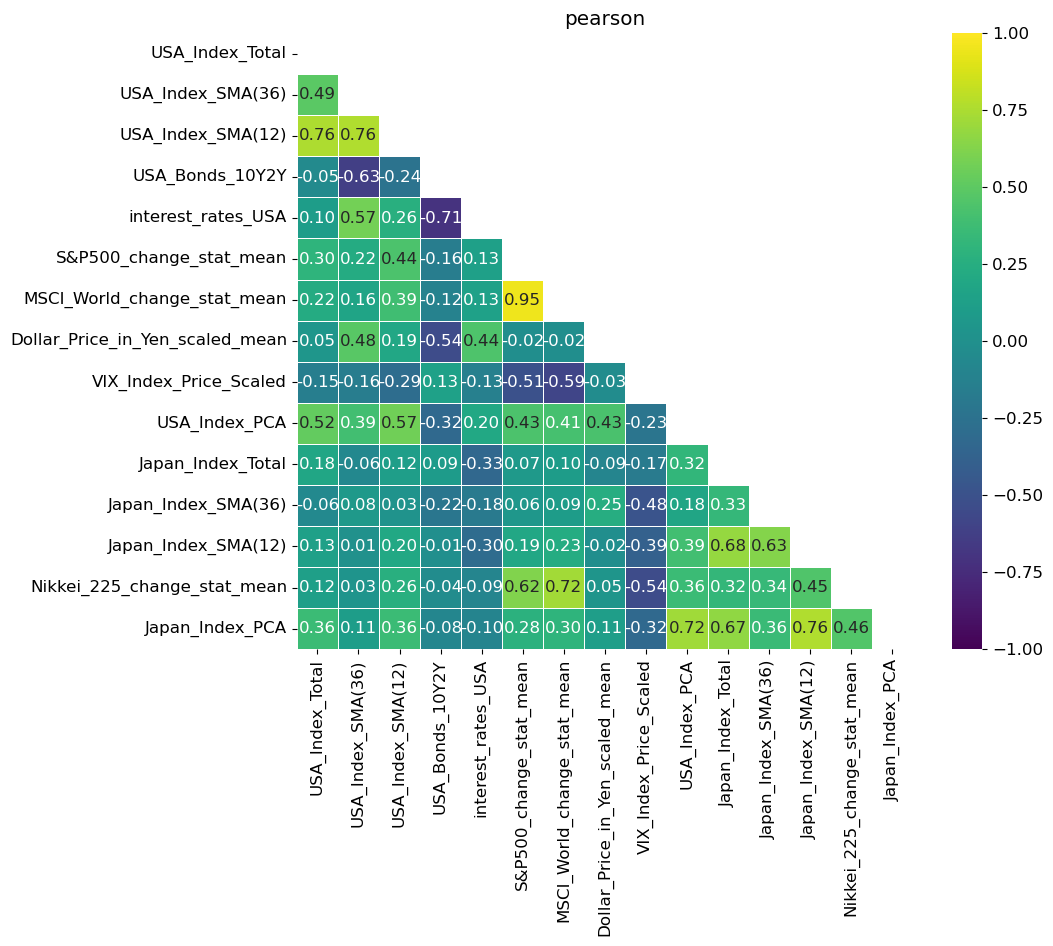

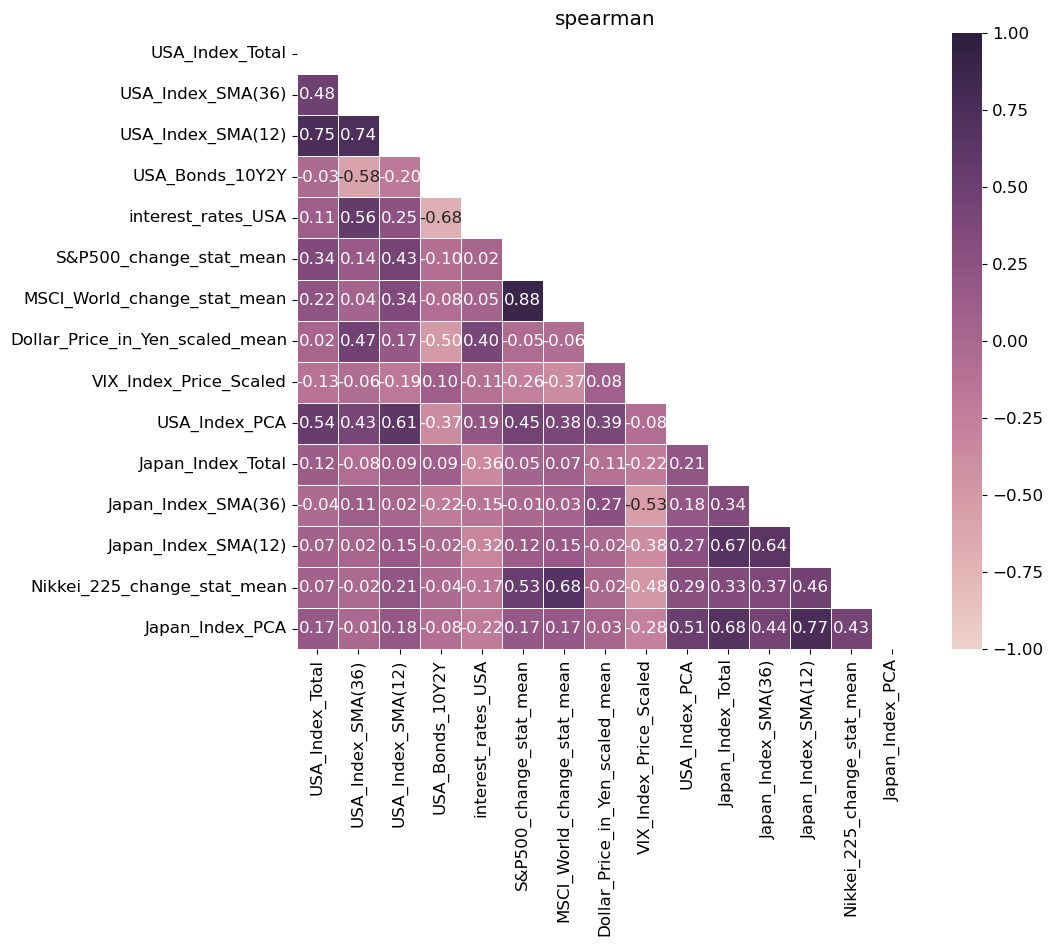

In [213]:
mask = np.triu(np.ones_like(full_df[36:].corr(), dtype=bool))


plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(full_df[36:].corr("pearson"), cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask= mask)
plt.title("pearson")

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(full_df[36:].corr("spearman"), cmap =sns.cubehelix_palette(as_cmap=True), vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask= mask)
plt.title("spearman")
plt.show()


In [214]:
full_df.to_csv("full_df_1990_2024.csv", index=True)

In [215]:
#   TODO: Ideas for Predictions?
        #   Linear Regression?
        #   NN?
        #   

In [216]:
#   TODO: concat the full dataframe
#country_index_usa
#country_index_japan
#trading_view['Bonds_10Y2Y']
#trading_view["Dollar_Price_in_Yen"]
#trading_view["S&P500"]
#trading_view["MSCI_World"]
#trading_view["VIX_Index_Price"]
#   Interest_Rates_USA

#   TODO: Prepare the ML Models
#   Predict: market values using USA_Index
#   Predict: Market Volatility
#   Predict: JPY-USD Volatility

In [217]:
#   TODO: correlation my_index, pca_index, to yen, to bonds, to market
#   TODO:  correlation IR to Bonds

In [218]:
#   TODO:  feature engineering: NEW INDEX bonds, rates?, market waves (market stationarize)?
#   TODO:  correlation market INDEX to yen
#   TODO:  correlation money_policies with market, yen 

In [219]:
#   TODO:  moving average to bond - yields. To see if crossing the lines prognose the recessions!

In [220]:
#   TODO:  moving average to interest rates

In [221]:
#   TODO:   same DataFrame for Japan and Nikkei..... Good Luck

<Axes: xlabel='Date'>

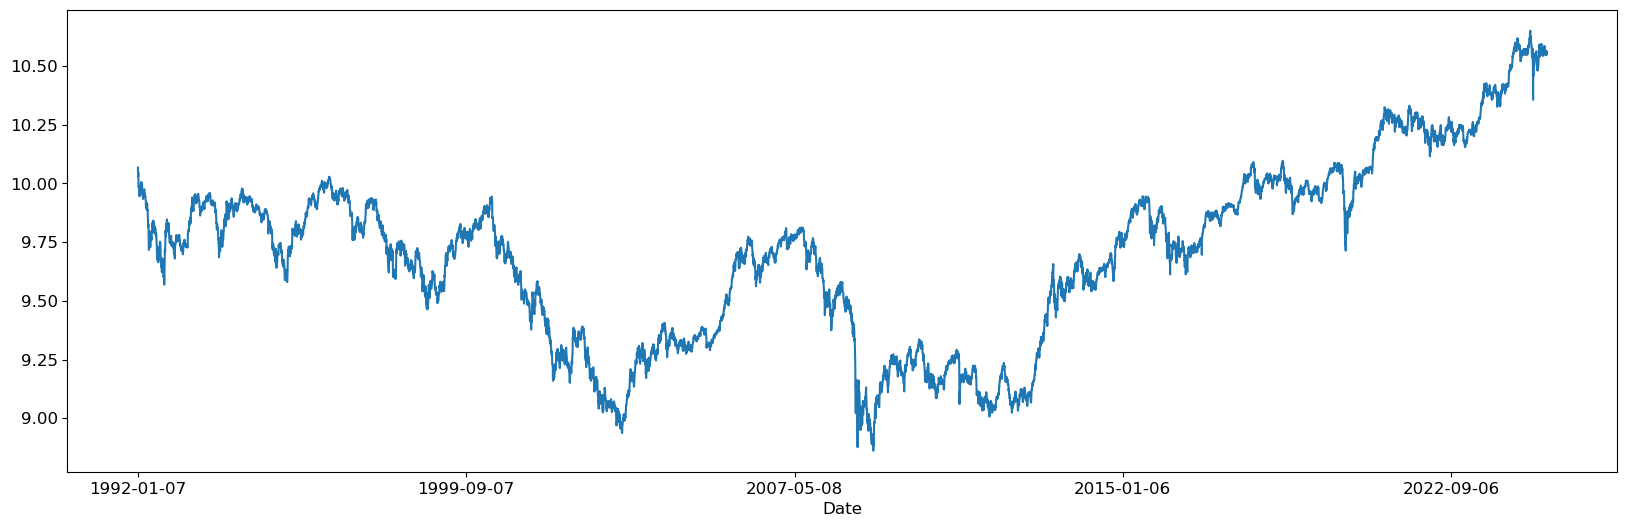

In [222]:
trading_view["Nikkei_225"].apply(lambda x: np.log(x)).plot(figsize=(20,6))

<Axes: xlabel='Date'>

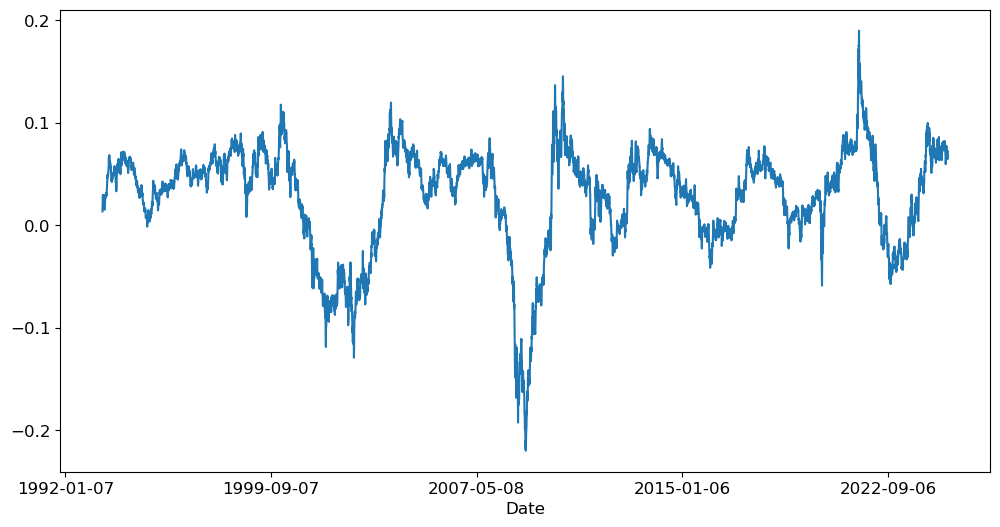

In [223]:

trading_view["MSCI_World"].pct_change().apply(lambda x:x*100).rolling(window=360).mean().plot(figsize=(12,6))

In [224]:
full_df.columns

Index(['USA_Index_Total', 'USA_Index_SMA(36)', 'USA_Index_SMA(12)',
       'USA_Bonds_10Y2Y', 'interest_rates_USA', 'S&P500_change_stat_mean',
       'MSCI_World_change_stat_mean', 'Dollar_Price_in_Yen_scaled_mean',
       'VIX_Index_Price_Scaled', 'USA_Index_PCA', 'Japan_Index_Total',
       'Japan_Index_SMA(36)', 'Japan_Index_SMA(12)',
       'Nikkei_225_change_stat_mean', 'Japan_Index_PCA'],
      dtype='object')

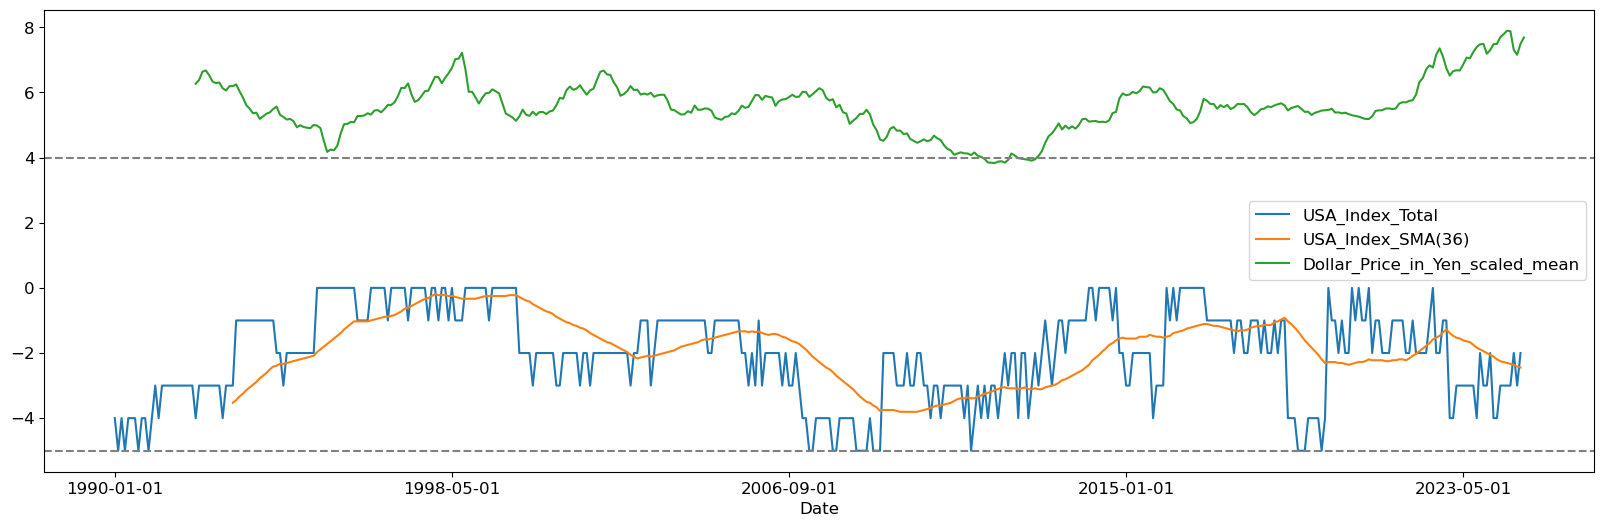

In [225]:
full_df[["USA_Index_Total", 'USA_Index_SMA(36)', 'Dollar_Price_in_Yen_scaled_mean']].plot(figsize=(20,6))
plt.axhline(y=4, color="grey", linestyle="--")
plt.axhline(y=-5, color="grey", linestyle="--")